# Jupyter notebook to plot petrological rock catalogue  


This jupyter notebook plot density and susceptibility relationship and boxplots for all rock samples devided by formation and rock type.

#### jupyter notebook written by Maximilian Lowe (maxwe32@bas.ac.uk). Last update 14/03/2024

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm
import os
import cartopy.crs as ccrs
from shapely.geometry.polygon import Polygon

In [2]:
export_fig_path_NAPA = "Petrological_data/Figure/"
# Create path if it does not exists
if not os.path.exists(export_fig_path_NAPA):
    os.makedirs(export_fig_path_NAPA)

# load data

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

NAPA_measurments_df = pd.read_csv(
    "Petrological_data/Density_and_susceptibility_rock_sample_catalogue_northern_Victoria_Land_East_Antarctica.csv",
    skiprows=43,
)

NAPA_measurments_df["susceptibility_1 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_1 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_2 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_2 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_3 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_3 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_4 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_4 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_5 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_5 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_6 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_6 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_7 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_7 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_8 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_8 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_average (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_average (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_std (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_std (10-3 SI)"] * 1e-3
)

filename = "DATA/GeoMap_Coastline_df.geojson"
file = open(filename)
Coastline = gpd.read_file(file)

# Sorted by formation

#### Berg Group

In [4]:
NAPA_Berg_Group_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Berg Group")
]

NAPA_Berg_Group_density_mean = np.mean(NAPA_Berg_Group_df["density (g/cm^3)"])
NAPA_Berg_Group_density_std = np.std(NAPA_Berg_Group_df["density (g/cm^3)"])
NAPA_Berg_Group_sus_mean = np.mean(
    NAPA_Berg_Group_df["susceptibility_average (10-3 SI)"]
)
NAPA_Berg_Group_sus_std = np.std(NAPA_Berg_Group_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Berg_Group_gpdf = gpd.GeoDataFrame(
    NAPA_Berg_Group_df,
    geometry=gpd.points_from_xy(
        NAPA_Berg_Group_df["longitude (degree_east)"],
        NAPA_Berg_Group_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Berg_Group_ps_gpdf = NAPA_Berg_Group_gpdf.to_crs(3031)

#### Bowers Supergroup

In [5]:
NAPA_Bowers_Supergroup_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Bowers Supergroup")
]

NAPA_Bowers_Supergroup_density_mean = np.mean(
    NAPA_Bowers_Supergroup_df["density (g/cm^3)"]
)
NAPA_Bowers_Supergroup_density_std = np.std(
    NAPA_Bowers_Supergroup_df["density (g/cm^3)"]
)
NAPA_Bowers_Supergroup_sus_mean = np.mean(
    NAPA_Bowers_Supergroup_df["susceptibility_average (10-3 SI)"]
)
NAPA_Bowers_Supergroup_sus_std = np.std(
    NAPA_Bowers_Supergroup_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Bowers_Supergroup_gpdf = gpd.GeoDataFrame(
    NAPA_Bowers_Supergroup_df,
    geometry=gpd.points_from_xy(
        NAPA_Bowers_Supergroup_df["longitude (degree_east)"],
        NAPA_Bowers_Supergroup_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Bowers_Supergroup_ps_gpdf = NAPA_Bowers_Supergroup_gpdf.to_crs(3031)

#### Exposure Hill type deposits

In [6]:
NAPA_Exposure_Hill_type_deposits_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Exposure Hill type deposits")
]


NAPA_Exposure_Hill_type_deposits_density_mean = np.mean(
    NAPA_Exposure_Hill_type_deposits_df["density (g/cm^3)"]
)
NAPA_Exposure_Hill_type_deposits_density_std = np.std(
    NAPA_Exposure_Hill_type_deposits_df["density (g/cm^3)"]
)
NAPA_Exposure_Hill_type_deposits_sus_mean = np.mean(
    NAPA_Exposure_Hill_type_deposits_df["susceptibility_average (10-3 SI)"]
)
NAPA_Exposure_Hill_type_deposits_sus_std = np.std(
    NAPA_Exposure_Hill_type_deposits_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Exposure_Hill_type_deposits_gpdf = gpd.GeoDataFrame(
    NAPA_Exposure_Hill_type_deposits_df,
    geometry=gpd.points_from_xy(
        NAPA_Exposure_Hill_type_deposits_df["longitude (degree_east)"],
        NAPA_Exposure_Hill_type_deposits_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Exposure_Hill_type_deposits_ps_gpdf = NAPA_Exposure_Hill_type_deposits_gpdf.to_crs(
    3031
)

#### Ferrar

In [7]:
NAPA_Ferrar_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Ferrar Dolerites")
    | (NAPA_measurments_df["stratigraphy"] == "Ferrar Dolerite")
]


NAPA_Ferrar_density_mean = np.mean(NAPA_Ferrar_df["density (g/cm^3)"])
NAPA_Ferrar_density_std = np.std(NAPA_Ferrar_df["density (g/cm^3)"])
NAPA_Ferrar_sus_mean = np.mean(NAPA_Ferrar_df["susceptibility_average (10-3 SI)"])
NAPA_Ferrar_sus_std = np.std(NAPA_Ferrar_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Ferrar_gpdf = gpd.GeoDataFrame(
    NAPA_Ferrar_df,
    geometry=gpd.points_from_xy(
        NAPA_Ferrar_df["longitude (degree_east)"],
        NAPA_Ferrar_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Ferrar_ps_gpdf = NAPA_Ferrar_gpdf.to_crs(3031)

#### Granite Harbour Intrusives

In [8]:
NAPA_GHI_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Granite Harbour Intrusives")
]

NAPA_GHI_density_mean = np.mean(NAPA_GHI_df["density (g/cm^3)"])
NAPA_GHI_density_std = np.std(NAPA_GHI_df["density (g/cm^3)"])
NAPA_GHI_sus_mean = np.mean(NAPA_GHI_df["susceptibility_average (10-3 SI)"])
NAPA_GHI_sus_std = np.std(NAPA_GHI_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_GHI_gpdf = gpd.GeoDataFrame(
    NAPA_GHI_df,
    geometry=gpd.points_from_xy(
        NAPA_GHI_df["longitude (degree_east)"],
        NAPA_GHI_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_GHI_ps_gpdf = NAPA_GHI_gpdf.to_crs(3031)

print("GHI density mean: ", NAPA_GHI_density_mean)
print("GHI density std: ", NAPA_GHI_density_std)
print("GHI sus mean: ", NAPA_GHI_sus_mean)
print("GHI sus std: ", NAPA_GHI_sus_std)

GHI density mean:  2.6808591549295766
GHI density std:  0.17623769926306737
GHI sus mean:  0.0031463996478873235
GHI sus std:  0.006981043219150668


#### Kirkpatrick Basalts

In [9]:
NAPA_Kirkpatrick_Basalts_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Kirkpatrick Basalts")
    | (NAPA_measurments_df["stratigraphy"] == "Kirkpatrick Laven")
]


NAPA_Kirkpatrick_Basalts_density_mean = np.mean(
    NAPA_Kirkpatrick_Basalts_df["density (g/cm^3)"]
)
NAPA_Kirkpatrick_Basalts_density_std = np.std(
    NAPA_Kirkpatrick_Basalts_df["density (g/cm^3)"]
)
NAPA_Kirkpatrick_Basalts_sus_mean = np.mean(
    NAPA_Kirkpatrick_Basalts_df["susceptibility_average (10-3 SI)"]
)
NAPA_Kirkpatrick_Basalts_sus_std = np.std(
    NAPA_Kirkpatrick_Basalts_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Kirkpatrick_Basalts_gpdf = gpd.GeoDataFrame(
    NAPA_Kirkpatrick_Basalts_df,
    geometry=gpd.points_from_xy(
        NAPA_Kirkpatrick_Basalts_df["longitude (degree_east)"],
        NAPA_Kirkpatrick_Basalts_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Kirkpatrick_Basalts_ps_gpdf = NAPA_Kirkpatrick_Basalts_gpdf.to_crs(3031)

print("KPB density mean: ", NAPA_Kirkpatrick_Basalts_density_mean)
print("KPB density std: ", NAPA_Kirkpatrick_Basalts_density_std)
print("KPB sus mean: ", NAPA_Kirkpatrick_Basalts_sus_mean)
print("KPB sus std: ", NAPA_Kirkpatrick_Basalts_sus_std)

KPB density mean:  2.6852586206896554
KPB density std:  0.2055574053845843
KPB sus mean:  0.006189611853448276
KPB sus std:  0.0058036960730877205


#### Meander Intrusives

In [10]:
NAPA_Meander_Intrusives_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Meander Intrusives")
]

NAPA_Meander_Intrusives_density_mean = np.mean(
    NAPA_Meander_Intrusives_df["density (g/cm^3)"]
)
NAPA_Meander_Intrusives_density_std = np.std(
    NAPA_Meander_Intrusives_df["density (g/cm^3)"]
)
NAPA_Meander_Intrusives_sus_mean = np.mean(
    NAPA_Meander_Intrusives_df["susceptibility_average (10-3 SI)"]
)
NAPA_Meander_Intrusives_sus_std = np.std(
    NAPA_Meander_Intrusives_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Meander_Intrusives_gpdf = gpd.GeoDataFrame(
    NAPA_Meander_Intrusives_df,
    geometry=gpd.points_from_xy(
        NAPA_Meander_Intrusives_df["longitude (degree_east)"],
        NAPA_Meander_Intrusives_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Meander_Intrusives_ps_gpdf = NAPA_Meander_Intrusives_gpdf.to_crs(3031)

#### Oates Coast Granites 

In [11]:
NAPA_Oates_Coast_Granites_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Oates Coast Granites")
]

NAPA_Oates_Coast_Granites_density_mean = np.mean(
    NAPA_Oates_Coast_Granites_df["density (g/cm^3)"]
)
NAPA_Oates_Coast_Granites_density_std = np.std(
    NAPA_Oates_Coast_Granites_df["density (g/cm^3)"]
)
NAPA_Oates_Coast_Granites_sus_mean = np.mean(
    NAPA_Oates_Coast_Granites_df["susceptibility_average (10-3 SI)"]
)
NAPA_Oates_Coast_Granites_sus_std = np.std(
    NAPA_Oates_Coast_Granites_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Oates_Coast_Granites_gpdf = gpd.GeoDataFrame(
    NAPA_Oates_Coast_Granites_df,
    geometry=gpd.points_from_xy(
        NAPA_Oates_Coast_Granites_df["longitude (degree_east)"],
        NAPA_Oates_Coast_Granites_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Oates_Coast_Granites_ps_gpdf = NAPA_Oates_Coast_Granites_gpdf.to_crs(3031)

#### Robertson Bay Group

In [12]:
NAPA_Robertson_Bay_Group_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Robertson Bay Group")
]

NAPA_Robertson_Bay_Group_density_mean = np.mean(
    NAPA_Robertson_Bay_Group_df["density (g/cm^3)"]
)
NAPA_Robertson_Bay_Group_density_std = np.std(
    NAPA_Robertson_Bay_Group_df["density (g/cm^3)"]
)
NAPA_Robertson_Bay_Group_sus_mean = np.mean(
    NAPA_Robertson_Bay_Group_df["susceptibility_average (10-3 SI)"]
)
NAPA_Robertson_Bay_Group_sus_std = np.std(
    NAPA_Robertson_Bay_Group_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Robertson_Bay_Group_gpdf = gpd.GeoDataFrame(
    NAPA_Robertson_Bay_Group_df,
    geometry=gpd.points_from_xy(
        NAPA_Robertson_Bay_Group_df["longitude (degree_east)"],
        NAPA_Robertson_Bay_Group_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Robertson_Bay_Group_ps_gpdf = NAPA_Robertson_Bay_Group_gpdf.to_crs(3031)

#### Wilson Metamorphic Complex

In [13]:
NAPA_Wilson_Metamorphic_Complex_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Metamorphic Complex")
]

NAPA_Wilson_Metamorphic_Complex_density_mean = np.mean(
    NAPA_Wilson_Metamorphic_Complex_df["density (g/cm^3)"]
)
NAPA_Wilson_Metamorphic_Complex_density_std = np.std(
    NAPA_Wilson_Metamorphic_Complex_df["density (g/cm^3)"]
)
NAPA_Wilson_Metamorphic_Complex_sus_mean = np.mean(
    NAPA_Wilson_Metamorphic_Complex_df["susceptibility_average (10-3 SI)"]
)
NAPA_Wilson_Metamorphic_Complex_sus_std = np.std(
    NAPA_Wilson_Metamorphic_Complex_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Wilson_Metamorphic_Complex_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Metamorphic_Complex_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Metamorphic_Complex_df["longitude (degree_east)"],
        NAPA_Wilson_Metamorphic_Complex_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Metamorphic_Complex_ps_gpdf = NAPA_Wilson_Metamorphic_Complex_gpdf.to_crs(
    3031
)

#### Wilson Polymetamorphic Complex

In [14]:
NAPA_Wilson_Polymetamorphic_Complex_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Polymetamorphic Complex")
]

NAPA_Wilson_Polymetamorphic_Complex_density_mean = np.mean(
    NAPA_Wilson_Polymetamorphic_Complex_df["density (g/cm^3)"]
)
NAPA_Wilson_Polymetamorphic_Complex_density_std = np.std(
    NAPA_Wilson_Polymetamorphic_Complex_df["density (g/cm^3)"]
)
NAPA_Wilson_Polymetamorphic_Complex_sus_mean = np.mean(
    NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_average (10-3 SI)"]
)
NAPA_Wilson_Polymetamorphic_Complex_sus_std = np.std(
    NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Wilson_Polymetamorphic_Complex_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Polymetamorphic_Complex_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Polymetamorphic_Complex_df["longitude (degree_east)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf = (
    NAPA_Wilson_Polymetamorphic_Complex_gpdf.to_crs(3031)
)

#### Wilson Schist

In [15]:
NAPA_Wilson_Schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Schist")
]

NAPA_Wilson_Schist_density_mean = np.mean(NAPA_Wilson_Schist_df["density (g/cm^3)"])
NAPA_Wilson_Schist_density_std = np.std(NAPA_Wilson_Schist_df["density (g/cm^3)"])
NAPA_Wilson_Schist_sus_mean = np.mean(
    NAPA_Wilson_Schist_df["susceptibility_average (10-3 SI)"]
)
NAPA_Wilson_Schist_sus_std = np.std(
    NAPA_Wilson_Schist_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Wilson_Schist_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Schist_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Schist_df["longitude (degree_east)"],
        NAPA_Wilson_Schist_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Schist_ps_gpdf = NAPA_Wilson_Schist_gpdf.to_crs(3031)

#### Millen Schist

In [16]:
NAPA_Millen_Schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Millen Schist")
]

NAPA_Millen_Schist_density_mean = np.mean(NAPA_Millen_Schist_df["density (g/cm^3)"])
NAPA_Millen_Schist_density_std = np.std(NAPA_Millen_Schist_df["density (g/cm^3)"])
NAPA_Millen_Schist_sus_mean = np.mean(
    NAPA_Millen_Schist_df["susceptibility_average (10-3 SI)"]
)
NAPA_Millen_Schist_sus_std = np.std(
    NAPA_Millen_Schist_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Millen_Schist_gpdf = gpd.GeoDataFrame(
    NAPA_Millen_Schist_df,
    geometry=gpd.points_from_xy(
        NAPA_Millen_Schist_df["longitude (degree_east)"],
        NAPA_Millen_Schist_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Millen_Schist_ps_gpdf = NAPA_Millen_Schist_gpdf.to_crs(3031)

# Plot rock formation data

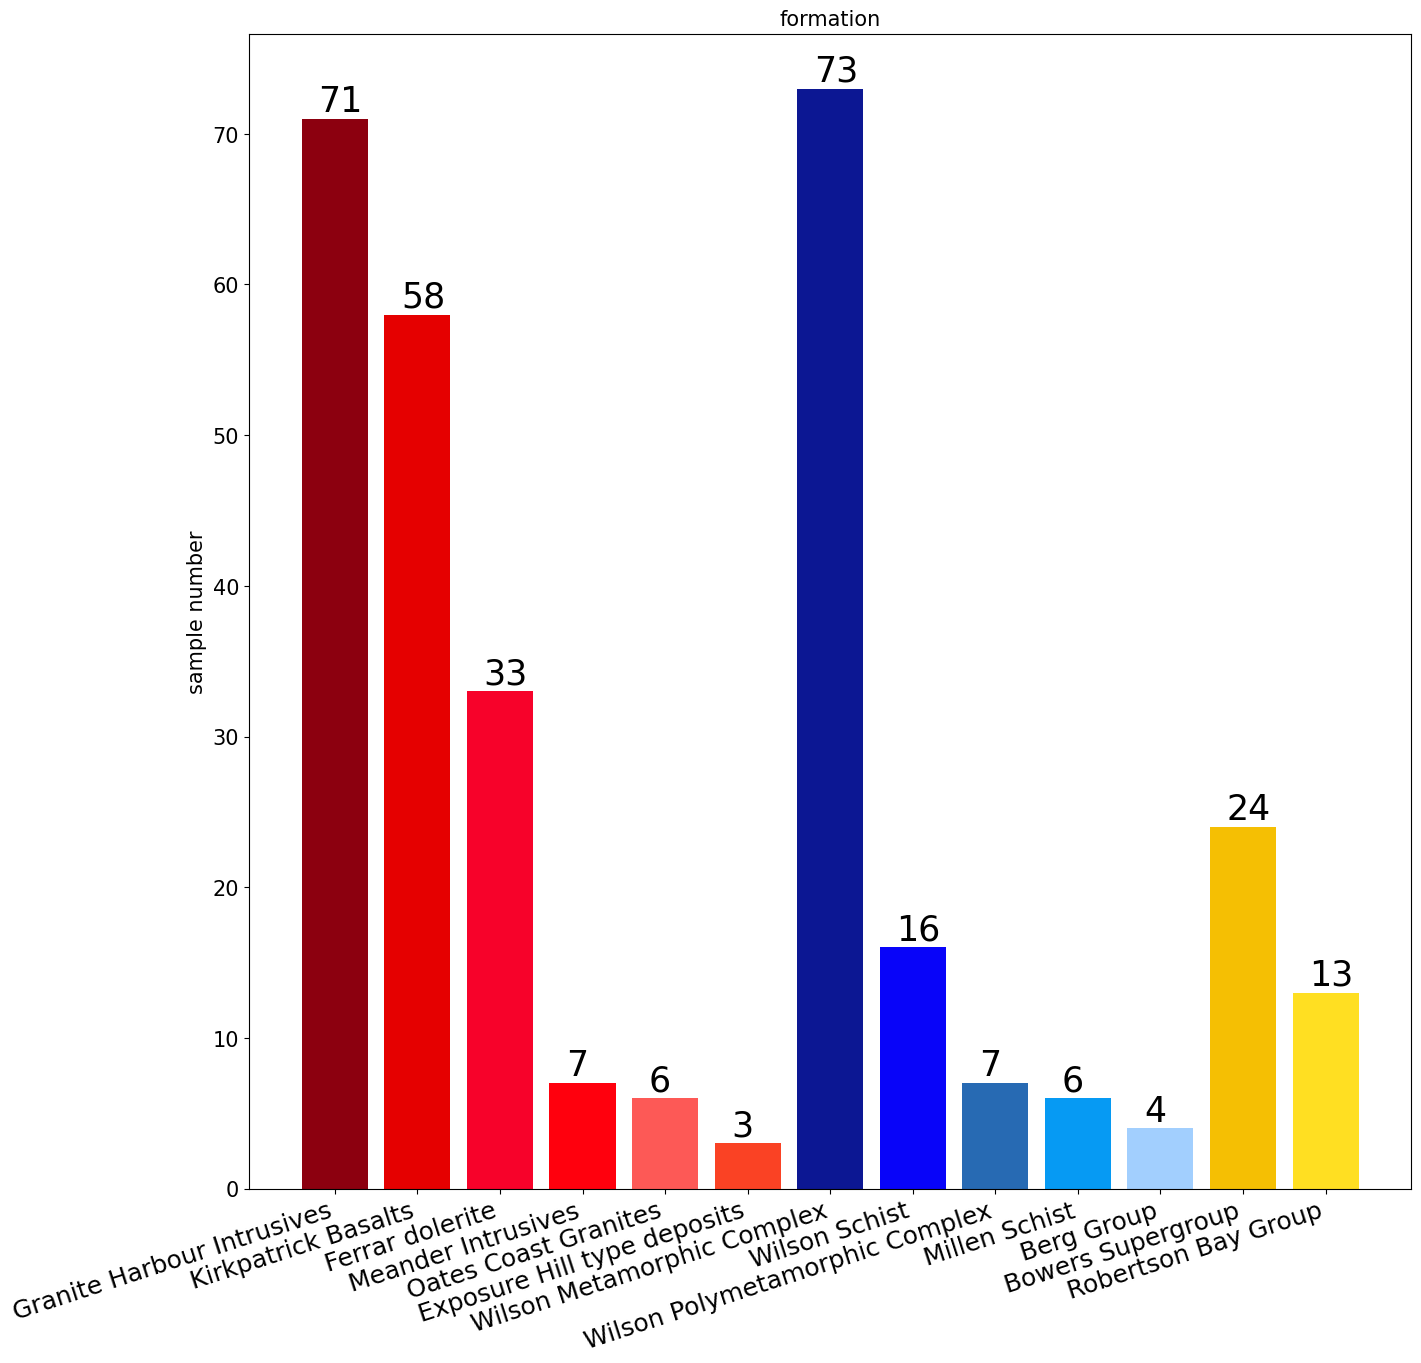

In [17]:
x_category = [
    "Granite Harbour Intrusives",  
    "Kirkpatrick Basalts",
    "Ferrar dolerite",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Exposure Hill type deposits",
    
    "Wilson Metamorphic Complex",
    "Wilson Schist",
    "Wilson Polymetamorphic Complex",
    "Millen Schist",
    "Berg Group",
    
    "Bowers Supergroup",
    "Robertson Bay Group"
]

y_sample_num = [
    len(NAPA_GHI_df),    
    len(NAPA_Kirkpatrick_Basalts_df),
    len(NAPA_Ferrar_df),
    len(NAPA_Meander_Intrusives_df),
    len(NAPA_Oates_Coast_Granites_df),
    len(NAPA_Exposure_Hill_type_deposits_df),
    
    len(NAPA_Wilson_Metamorphic_Complex_df),
    len(NAPA_Wilson_Schist_df),
    len(NAPA_Wilson_Polymetamorphic_Complex_df),
    len(NAPA_Millen_Schist_df),
    len(NAPA_Berg_Group_df),
      
    len(NAPA_Bowers_Supergroup_df),
    len(NAPA_Robertson_Bay_Group_df)
]


# plot
figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

plt.bar(
    x_category,
    y_sample_num,
    color=[
        "xkcd:crimson",         
        "xkcd:red",        
        "xkcd:cherry red",          
        "xkcd:bright red", 
        "xkcd:grapefruit", 
        "xkcd:orangey red",         

        "xkcd:royal",
        "xkcd:primary blue",
        "xkcd:mid blue",
        "xkcd:azure",
        "xkcd:baby blue",

        "xkcd:golden",
        "xkcd:sun yellow"        

    ],
)

plt.title("formation", fontsize=15)
plt.ylabel("sample number", fontsize=15)
plt.setp(ax1.get_xticklabels(), rotation=18, ha="right")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.xaxis.set_tick_params(labelsize=18)
# ax1.grid(visible=True, which='major' ,axis='y' , color='k', linestyle='-' , alpha=0.35)

for p in ax1.patches:
    ax1.annotate(
        "{:.0f}".format(p.get_height()),
        (p.get_x() + 0.20, p.get_height() + 0.5),
        fontsize=25,
    )

plt.savefig(
    export_fig_path_NAPA + "sample_histogramm_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

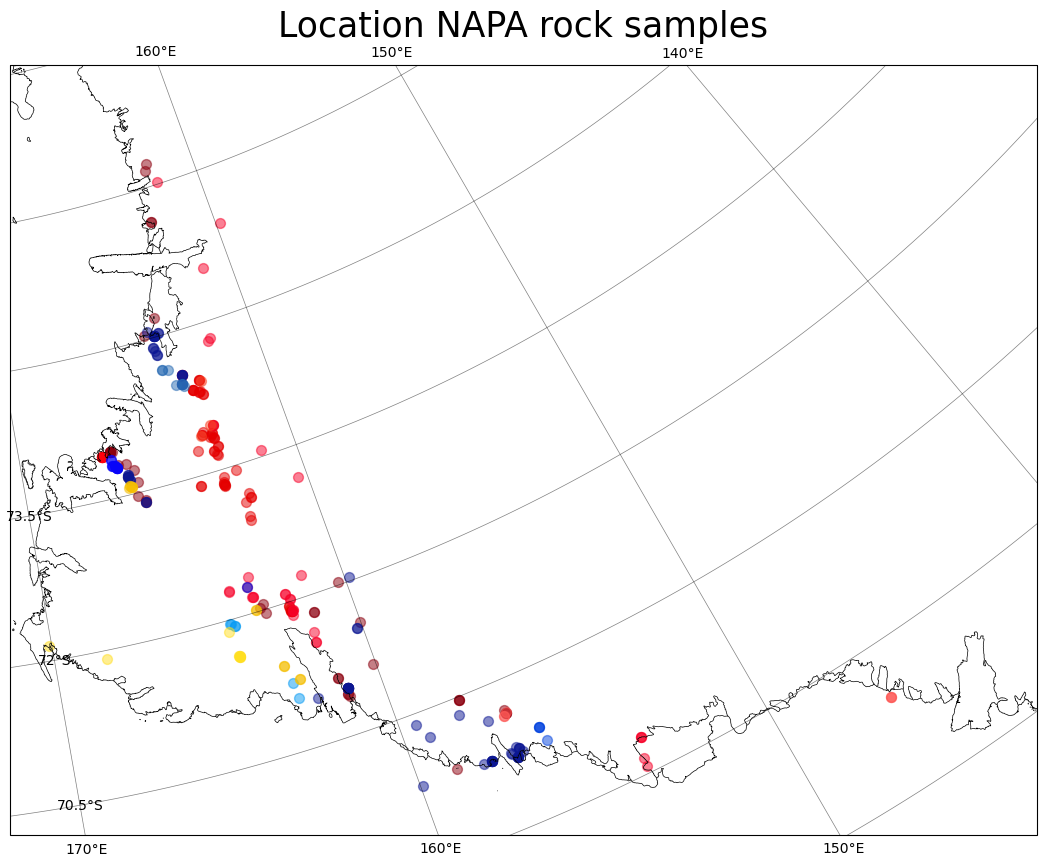

In [18]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)


NAPA_GHI_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:crimson",
    markersize=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:red",
    markersize=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)

NAPA_Ferrar_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:cherry red",
    markersize=50, 
    alpha=0.5, 
    label="Ferrar"
)

NAPA_Meander_Intrusives_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:bright red",
    markersize=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:grapefruit",
    markersize=50,
    alpha=0.5,
    label="Oates Coast Granites",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:orangey red",
    markersize=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)

NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:royal",
    markersize=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)

NAPA_Wilson_Schist_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:primary blue",
    markersize=50,
    alpha=0.5,
    label="Wilson Schist",
)

NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:mid blue",
    markersize=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)

NAPA_Millen_Schist_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:azure",
    markersize=50,
    alpha=0.5,
    label="Millen Schist",
)

NAPA_Berg_Group_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:blue", 
    markersize=50, 
    alpha=0.5, 
    label="Berg Group"
)


NAPA_Bowers_Supergroup_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:golden",
    markersize=50,
    alpha=0.5,
    label="Bowers Supergroup",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:sun yellow",
    markersize=50,
    alpha=0.5,
    label="Robertson Bay Group",
)


ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.2e6, -1.3e6])

# ax1.legend(loc='upper right')
ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "formation_location_zoom_paper.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### Susceptibility box plots

In [19]:
Berg_Group_all_sus_NAPA = np.vstack(
    [
        NAPA_Berg_Group_df["susceptibility_1 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_2 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_3 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_4 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_5 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_6 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_7 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Bowers_Supergroup_all_sus_NAPA = np.vstack(
    [
        NAPA_Bowers_Supergroup_df["susceptibility_1 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_2 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_3 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_4 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_5 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_6 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_7 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Exposure_Hill_type_deposits_all_sus_NAPA = np.vstack(
    [
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_1 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_2 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_3 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_4 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_5 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_6 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_7 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Ferrar_all_sus_NAPA = np.vstack(
    [
        NAPA_Ferrar_df["susceptibility_1 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_2 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_3 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_4 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_5 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_6 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_7 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Granite_Harbour_Intrusives_all_sus_NAPA = np.vstack(
    [
        NAPA_GHI_df["susceptibility_1 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_2 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_3 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_4 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_5 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_6 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_7 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Kirkpatrick_Basalts_all_sus_NAPA = np.vstack(
    [
        NAPA_Kirkpatrick_Basalts_df["susceptibility_1 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_2 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_3 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_4 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_5 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_6 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_7 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Meander_Intrusives_all_sus_NAPA = np.vstack(
    [
        NAPA_Meander_Intrusives_df["susceptibility_1 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_2 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_3 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_4 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_5 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_6 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_7 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_8 (10-3 SI)"],
    ]
).T

NAPA_Oates_Coast_Granites_all_sus_NAPA = np.vstack(
    [
        NAPA_Oates_Coast_Granites_df["susceptibility_1 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_2 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_3 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_4 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_5 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_6 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_7 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Robertson_Bay_Group_all_sus_NAPA = np.vstack(
    [
        NAPA_Robertson_Bay_Group_df["susceptibility_1 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_2 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_3 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_4 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_5 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_6 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_7 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Wilson_Metamorphic_Complex_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_1 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_2 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_3 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_4 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_5 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_6 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_7 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Wilson_Polymetamorphic_Complex_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_1 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_2 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_3 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_4 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_5 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_6 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_7 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Wilson_Schist_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Schist_df["susceptibility_1 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_2 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_3 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_4 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_5 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_6 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_7 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Millen_Schist_all_sus_NAPA = np.vstack(
    [
        NAPA_Millen_Schist_df["susceptibility_1 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_2 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_3 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_4 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_5 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_6 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_7 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_8 (10-3 SI)"],
    ]
).T

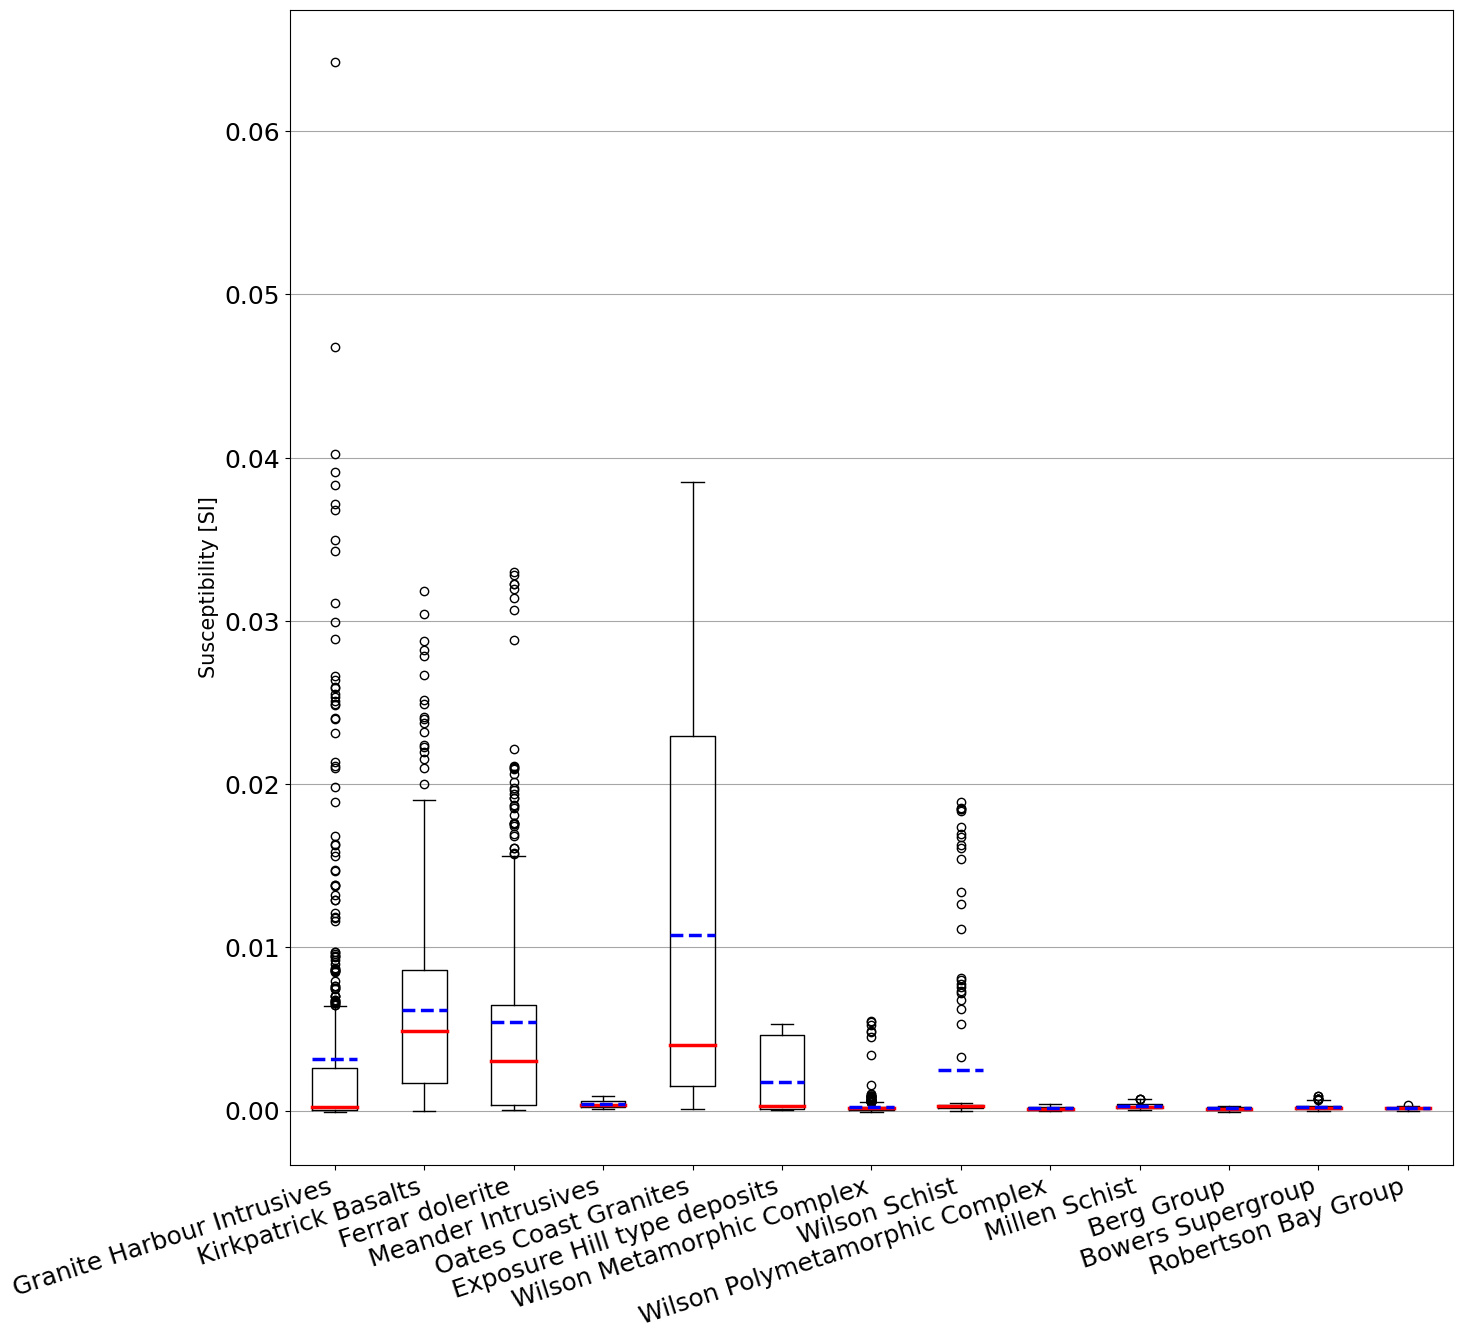

In [20]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")

sus_values_ls = [
    Granite_Harbour_Intrusives_all_sus_NAPA.flatten(),
    Kirkpatrick_Basalts_all_sus_NAPA.flatten(),
    Ferrar_all_sus_NAPA.flatten(),
    Meander_Intrusives_all_sus_NAPA.flatten(),
    NAPA_Oates_Coast_Granites_all_sus_NAPA.flatten(),
    Exposure_Hill_type_deposits_all_sus_NAPA.flatten(),  
    
    Wilson_Metamorphic_Complex_all_sus_NAPA.flatten(),
    Wilson_Schist_all_sus_NAPA.flatten(),
    Wilson_Polymetamorphic_Complex_all_sus_NAPA.flatten(),
    Millen_Schist_all_sus_NAPA.flatten(),
    Berg_Group_all_sus_NAPA.flatten(),
    
    Bowers_Supergroup_all_sus_NAPA.flatten(),
    Robertson_Bay_Group_all_sus_NAPA.flatten(),
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)
ax1.boxplot(
    sus_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)
x_labels = [
    "Granite Harbour Intrusives",  
    "Kirkpatrick Basalts",
    "Ferrar dolerite",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Exposure Hill type deposits",
    
    "Wilson Metamorphic Complex",
    "Wilson Schist",
    "Wilson Polymetamorphic Complex",
    "Millen Schist",
    "Berg Group",
    
    "Bowers Supergroup",
    "Robertson Bay Group" 
]

x_ticks_num = np.arange(1, 14, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=18, ha="right")
ax1.set_ylabel("Susceptibility [SI]", fontsize=15)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_susceptbility_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

##### Density box plots

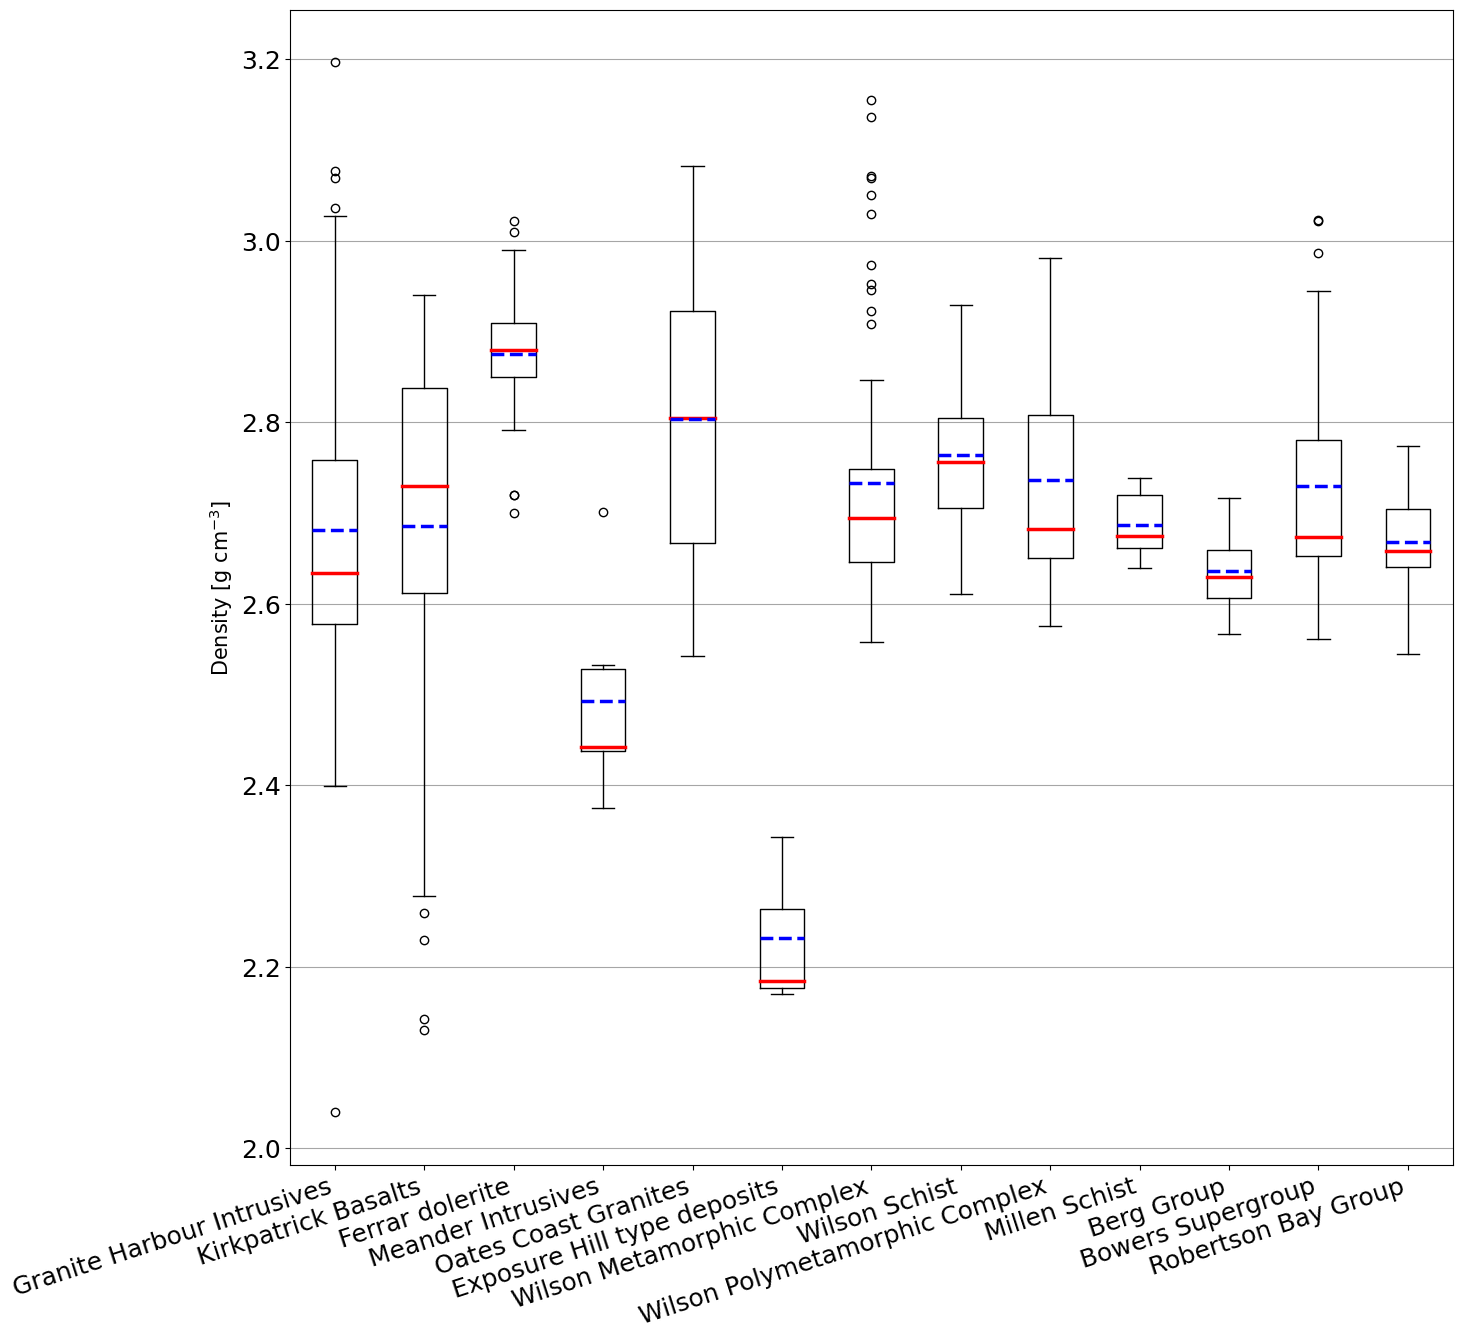

In [21]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


dens_values_ls = [
    NAPA_GHI_df["density (g/cm^3)"],    
    NAPA_Kirkpatrick_Basalts_df["density (g/cm^3)"],
    NAPA_Ferrar_df["density (g/cm^3)"],
    NAPA_Meander_Intrusives_df["density (g/cm^3)"],
    NAPA_Oates_Coast_Granites_df["density (g/cm^3)"],
    NAPA_Exposure_Hill_type_deposits_df["density (g/cm^3)"],
    
    NAPA_Wilson_Metamorphic_Complex_df["density (g/cm^3)"],
    NAPA_Wilson_Schist_df["density (g/cm^3)"],
    NAPA_Wilson_Polymetamorphic_Complex_df["density (g/cm^3)"],
    NAPA_Millen_Schist_df["density (g/cm^3)"],
    NAPA_Berg_Group_df["density (g/cm^3)"],
    
    NAPA_Bowers_Supergroup_df["density (g/cm^3)"],
    NAPA_Robertson_Bay_Group_df["density (g/cm^3)"]
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    dens_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Granite Harbour Intrusives",  
    "Kirkpatrick Basalts",
    "Ferrar dolerite",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Exposure Hill type deposits",
    
    "Wilson Metamorphic Complex",
    "Wilson Schist",
    "Wilson Polymetamorphic Complex",
    "Millen Schist",
    "Berg Group",
    
    "Bowers Supergroup",
    "Robertson Bay Group"
]

x_ticks_num = np.arange(1, 14, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=18, ha="right")
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_desnity_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

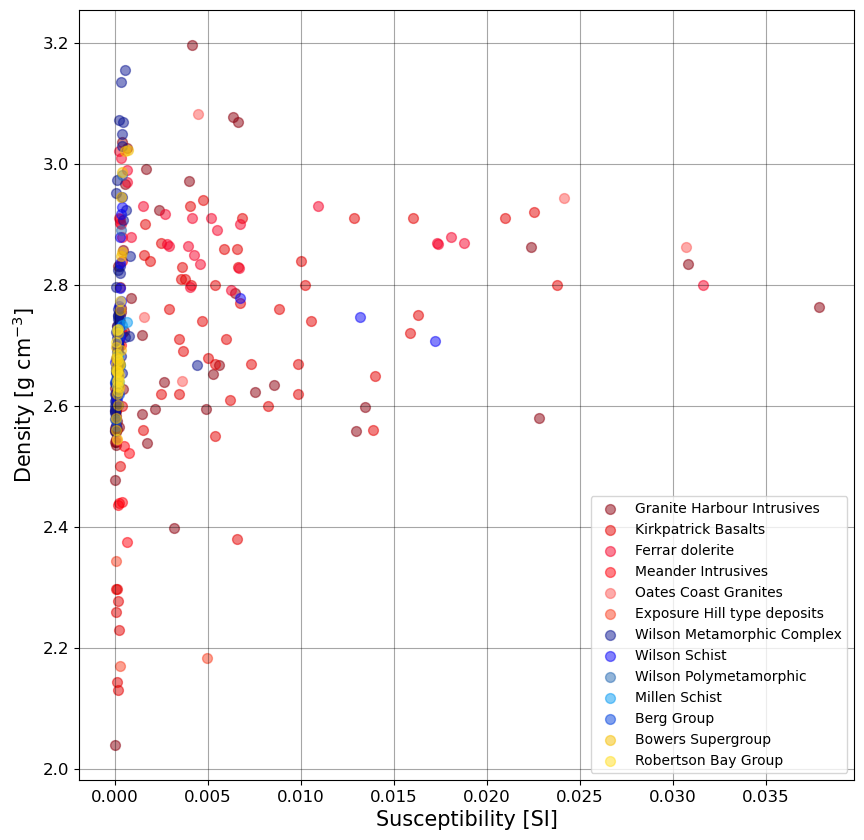

In [22]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:crimson",
    s=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)


NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:red",
    s=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:cherry red",
    s=50,
    alpha=0.5,
    label="Ferrar dolerite",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:bright red",
    s=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:grapefruit",
    s=50,
    alpha=0.5,
    label="Oates Coast Granites",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:orangey red",
    s=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)



NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:royal",
    s=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:primary blue",
    s=50,
    alpha=0.5,
    label="Wilson Schist",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:mid blue",
    s=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:azure",
    s=50,
    alpha=0.5,
    label="Millen Schist",
)

NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:blue",
    alpha=0.5,
    label="Berg Group",
)


NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    color="xkcd:golden",
    alpha=0.5,
    label="Bowers Supergroup",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:sun yellow",
    s=50,
    alpha=0.5,
    label="Robertson Bay Group",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

In [23]:
zoom_x = [-0.0005, 0.002, 0.002, -0.0005, -0.0005]
zoom_y = [2, 2, 3.2, 3.2, 2]

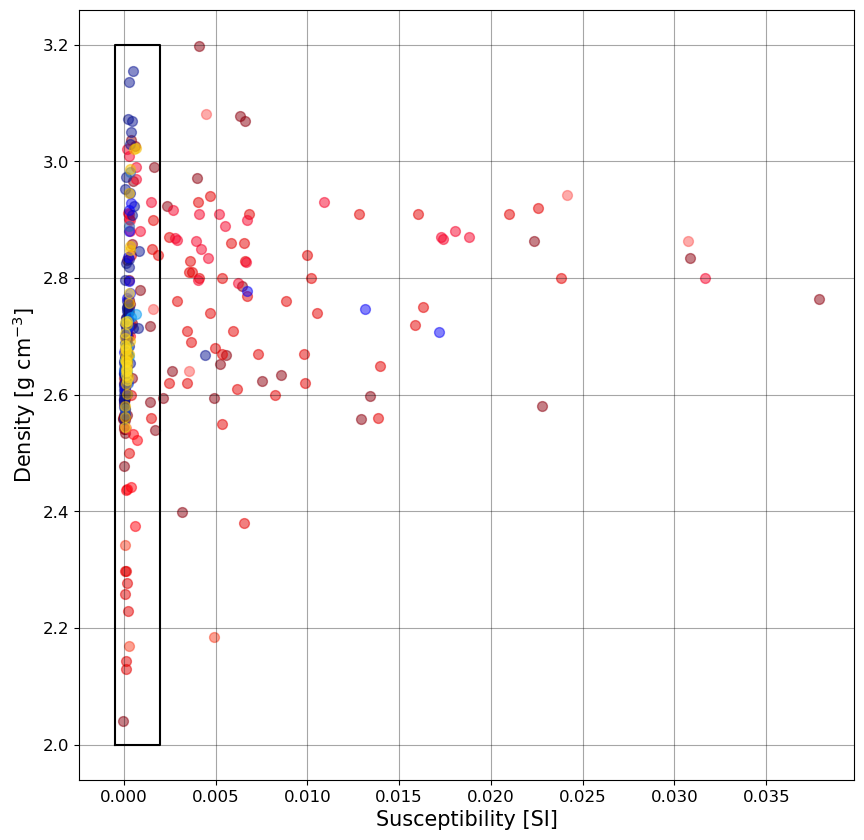

In [24]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:crimson",
    s=50,
    alpha=0.5,
#     label="Granite Harbour Intrusives",
)


NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:red",
    s=50,
    alpha=0.5,
#     label="Kirkpatrick Basalts",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:cherry red",
    s=50,
    alpha=0.5,
#     label="Ferrar dolerite",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:bright red",
    s=50,
    alpha=0.5,
#     label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:grapefruit",
    s=50,
    alpha=0.5,
#     label="Oates Coast Granites",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:orangey red",
    s=50,
    alpha=0.5,
#     label="Exposure Hill type deposits",
)



NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:royal",
    s=50,
    alpha=0.5,
#     label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:primary blue",
    s=50,
    alpha=0.5,
#     label="Wilson Schist",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:mid blue",
    s=50,
    alpha=0.5,
#     label="Wilson Polymetamorphic",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:azure",
    s=50,
    alpha=0.5,
#     label="Millen Schist",
)

NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:blue",
    alpha=0.5,
#     label="Berg Group",
)


NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    color="xkcd:golden",
    alpha=0.5,
#     label="Bowers Supergroup",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:sun yellow",
    s=50,
    alpha=0.5,
#     label="Robertson Bay Group",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

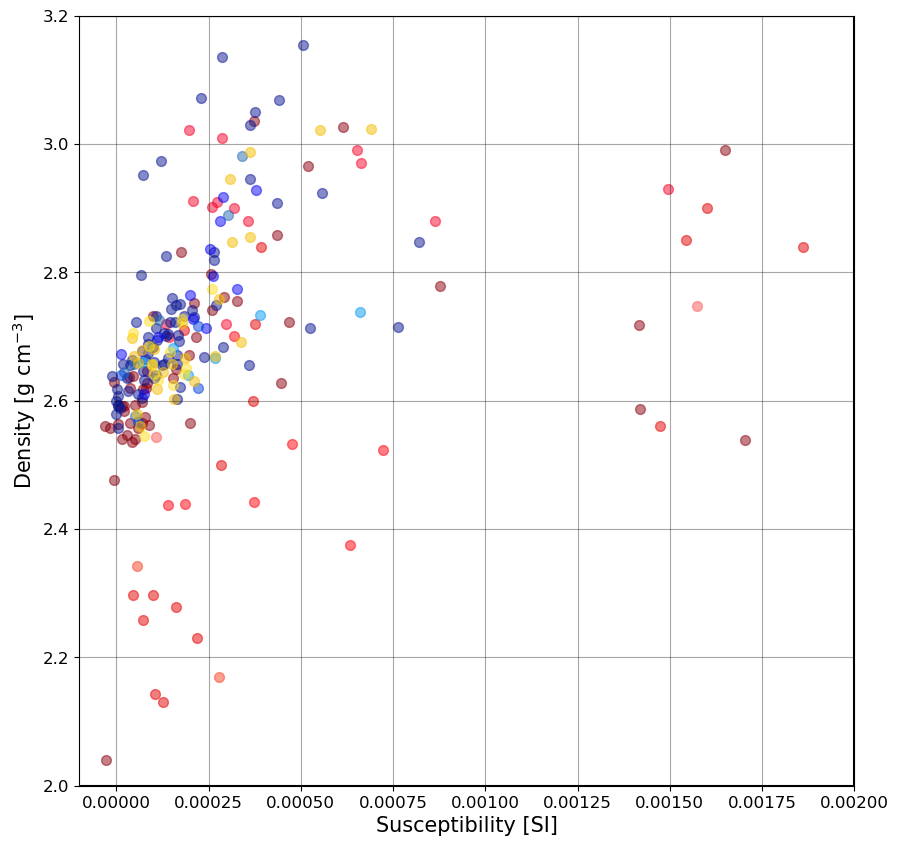

In [25]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:crimson",
    s=50,
    alpha=0.5,
#     label="Granite Harbour Intrusives",
)


NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:red",
    s=50,
    alpha=0.5,
#     label="Kirkpatrick Basalts",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:cherry red",
    s=50,
    alpha=0.5,
#     label="Ferrar dolerite",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:bright red",
    s=50,
    alpha=0.5,
#     label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:grapefruit",
    s=50,
    alpha=0.5,
#     label="Oates Coast Granites",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:orangey red",
    s=50,
    alpha=0.5,
#     label="Exposure Hill type deposits",
)



NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:royal",
    s=50,
    alpha=0.5,
#     label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:primary blue",
    s=50,
    alpha=0.5,
#     label="Wilson Schist",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:mid blue",
    s=50,
    alpha=0.5,
#     label="Wilson Polymetamorphic",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:azure",
    s=50,
    alpha=0.5,
#     label="Millen Schist",
)

NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:blue",
    alpha=0.5,
#     label="Berg Group",
)


NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    color="xkcd:golden",
    alpha=0.5,
#     label="Bowers Supergroup",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="xkcd:sun yellow",
    s=50,
    alpha=0.5,
#     label="Robertson Bay Group",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])

plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

# Plot rock type data

#### Amphibolite

In [26]:
NAPA_amphibolite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Amphibolite")
    | (NAPA_measurments_df["rocktype"] == "Granet-amphibole-schist")
    | (NAPA_measurments_df["rocktype"] == 'Garnet-"Amphibolite"')
]


NAPA_amphibolite_density_mean = np.mean(NAPA_amphibolite_df["density (g/cm^3)"])
NAPA_amphibolite_density_std = np.std(NAPA_amphibolite_df["density (g/cm^3)"])
NAPA_amphibolite_sus_mean = np.mean(
    NAPA_amphibolite_df["susceptibility_average (10-3 SI)"]
)
NAPA_amphibolite_sus_std = np.std(
    NAPA_amphibolite_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_amphibolite_gpdf = gpd.GeoDataFrame(
    NAPA_amphibolite_df,
    geometry=gpd.points_from_xy(
        NAPA_amphibolite_df["longitude (degree_east)"],
        NAPA_amphibolite_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_amphibolite_ps_gpdf = NAPA_amphibolite_gpdf.to_crs(3031)

#### Basalt 

In [27]:
NAPA_Basalt_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Basalt")
    | (NAPA_measurments_df["rocktype"] == "Basalt-Sill")
    | (NAPA_measurments_df["rocktype"] == "KPB")
]


NAPA_Basalt_density_mean = np.mean(NAPA_Basalt_df["density (g/cm^3)"])
NAPA_Basalt_density_std = np.std(NAPA_Basalt_df["density (g/cm^3)"])
NAPA_Basalt_sus_mean = np.mean(NAPA_Basalt_df["susceptibility_average (10-3 SI)"])
NAPA_Basalt_sus_std = np.std(NAPA_Basalt_df["susceptibility_average (10-3 SI)"])
NAPA_Basalt_sus_median = np.median(NAPA_Basalt_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Basalt_gpdf = gpd.GeoDataFrame(
    NAPA_Basalt_df,
    geometry=gpd.points_from_xy(
        NAPA_Basalt_df["longitude (degree_east)"],
        NAPA_Basalt_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Basalt_ps_gpdf = NAPA_Basalt_gpdf.to_crs(3031)

print("Basalt density mean: ", NAPA_Basalt_density_mean)
print("Basalt density std: ", NAPA_Basalt_density_std)
print("Basalt sus mean: ", NAPA_Basalt_sus_mean)
print("Basalt sus std: ", NAPA_Basalt_sus_std)
print("Basalt sus median: ", NAPA_Basalt_sus_median)

Basalt density mean:  2.7503018867924527
Basalt density std:  0.12377361942015165
Basalt sus mean:  0.006949783018867925
Basalt sus std:  0.005613404356382086
Basalt sus median:  0.005368375000000001


#### Basite and ultrabasite

In [28]:
NAPA_Basite_and_ultrabasite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Ultrabasite")
    | (NAPA_measurments_df["rocktype"] == "Basite")
    | (NAPA_measurments_df["rocktype"] == "Basite or Ultrabasite")
]

NAPA_Basite_and_ultrabasite_density_mean = np.mean(
    NAPA_Basite_and_ultrabasite_df["density (g/cm^3)"]
)
NAPA_Basite_and_ultrabasite_density_std = np.std(
    NAPA_Basite_and_ultrabasite_df["density (g/cm^3)"]
)
NAPA_Basite_and_ultrabasite_sus_mean = np.mean(
    NAPA_Basite_and_ultrabasite_df["susceptibility_average (10-3 SI)"]
)
NAPA_Basite_and_ultrabasite_sus_std = np.std(
    NAPA_Basite_and_ultrabasite_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Basite_and_ultrabasite_gpdf = gpd.GeoDataFrame(
    NAPA_Basite_and_ultrabasite_df,
    geometry=gpd.points_from_xy(
        NAPA_Basite_and_ultrabasite_df["longitude (degree_east)"],
        NAPA_Basite_and_ultrabasite_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Basite_and_ultrabasite_ps_gpdf = NAPA_Basite_and_ultrabasite_gpdf.to_crs(3031)

#### Diorite

In [29]:
NAPA_Diorit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Diorite")
    | (NAPA_measurments_df["rocktype"] == "Hbl-Diorite")
]

NAPA_Diorit_density_mean = np.mean(NAPA_Diorit_df["density (g/cm^3)"])
NAPA_Diorit_density_std = np.std(NAPA_Diorit_df["density (g/cm^3)"])
NAPA_Diorit_sus_mean = np.mean(NAPA_Diorit_df["susceptibility_average (10-3 SI)"])
NAPA_Diorit_sus_std = np.std(NAPA_Diorit_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Diorit_gpdf = gpd.GeoDataFrame(
    NAPA_Diorit_df,
    geometry=gpd.points_from_xy(
        NAPA_Diorit_df["longitude (degree_east)"],
        NAPA_Diorit_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Diorit_ps_gpdf = NAPA_Diorit_gpdf.to_crs(3031)

#### Dolerite

In [30]:
NAPA_Dolerite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Dolerite")
    | (NAPA_measurments_df["rocktype"] == "Ferrar Dolerite")
    | (NAPA_measurments_df["rocktype"] == "FD")
]

NAPA_Dolerite_density_mean = np.mean(NAPA_Dolerite_df["density (g/cm^3)"])
NAPA_Dolerite_density_std = np.std(NAPA_Dolerite_df["density (g/cm^3)"])
NAPA_Dolerite_sus_mean = np.mean(NAPA_Dolerite_df["susceptibility_average (10-3 SI)"])
NAPA_Dolerite_sus_std = np.std(NAPA_Dolerite_df["susceptibility_average (10-3 SI)"])
NAPA_Dolerite_sus_median = np.median(
    NAPA_Dolerite_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Dolerite_gpdf = gpd.GeoDataFrame(
    NAPA_Dolerite_df,
    geometry=gpd.points_from_xy(
        NAPA_Dolerite_df["longitude (degree_east)"],
        NAPA_Dolerite_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Dolerite_ps_gpdf = NAPA_Dolerite_gpdf.to_crs(3031)
## reproject geopanda dataframe to sterographic coordinates
NAPA_Dolerite_ps_gpdf = NAPA_Dolerite_gpdf.to_crs(3031)

print("FD density mean: ", NAPA_Dolerite_density_mean)
print("FD density std: ", NAPA_Dolerite_density_std)

print("FD sus mean: ", NAPA_Dolerite_sus_mean)
print("FD sus std: ", NAPA_Dolerite_sus_std)

print("FD sus median: ", NAPA_Dolerite_sus_median)

FD density mean:  2.8753214285714286
FD density std:  0.07768436759984437
FD sus mean:  0.0060319107142857145
FD sus std:  0.007627684921894567
FD sus median:  0.003467125


#### Gabbro

In [31]:
NAPA_Gabbro_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Gabbro")
    | (NAPA_measurments_df["rocktype"] == "Hornblende/Gabbro")
    | (NAPA_measurments_df["rocktype"] == "Gabbro (Diorite?)")
]

NAPA_Gabbro_density_mean = np.mean(NAPA_Gabbro_df["density (g/cm^3)"])
NAPA_Gabbro_density_std = np.std(NAPA_Gabbro_df["density (g/cm^3)"])
NAPA_Gabbro_sus_mean = np.mean(NAPA_Gabbro_df["susceptibility_average (10-3 SI)"])
NAPA_Gabbro_sus_std = np.std(NAPA_Gabbro_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Gabbro_gpdf = gpd.GeoDataFrame(
    NAPA_Gabbro_df,
    geometry=gpd.points_from_xy(
        NAPA_Gabbro_df["longitude (degree_east)"],
        NAPA_Gabbro_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Gabbro_ps_gpdf = NAPA_Gabbro_gpdf.to_crs(3031)

#### Gneiss

In [32]:
NAPA_Gneis_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Sillimanite-Biotite-Gneiss")
    | (NAPA_measurments_df["rocktype"] == "Hornblende-Gneiss")
    | (NAPA_measurments_df["rocktype"] == "Granite-Gneiss, medium-grain")
    | (NAPA_measurments_df["rocktype"] == "Orthogneiss/Granitoid")
    | (NAPA_measurments_df["rocktype"] == "Biotitegneiss")
    | (NAPA_measurments_df["rocktype"] == "Biotite-Gneiss")
    | (NAPA_measurments_df["rocktype"] == "Garnet-Gneiss")
    | (NAPA_measurments_df["rocktype"] == "Bt-Gneiss")
    | (NAPA_measurments_df["rocktype"] == "Sillimanitegneiss")
    | (NAPA_measurments_df["rocktype"] == "Sillimanite-Gneiss")
    | (NAPA_measurments_df["rocktype"] == "Granite/Orthogneiss")
    | (NAPA_measurments_df["rocktype"] == "Gneiss")
    | (NAPA_measurments_df["rocktype"] == "Orthogneiss")
    | (NAPA_measurments_df["rocktype"] == "Gneiss")
]


NAPA_Gneis_density_mean = np.mean(NAPA_Gneis_df["density (g/cm^3)"])
NAPA_Gneis_density_std = np.std(NAPA_Gneis_df["density (g/cm^3)"])
NAPA_Gneis_sus_mean = np.mean(NAPA_Gneis_df["susceptibility_average (10-3 SI)"])
NAPA_Gneis_sus_std = np.std(NAPA_Gneis_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Gneis_gpdf = gpd.GeoDataFrame(
    NAPA_Gneis_df,
    geometry=gpd.points_from_xy(
        NAPA_Gneis_df["longitude (degree_east)"],
        NAPA_Gneis_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Gneis_ps_gpdf = NAPA_Gneis_gpdf.to_crs(3031)

#### Granite

In [33]:
NAPA_Granite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Granite")
    | (NAPA_measurments_df["rocktype"] == "Granite, fine-grained")
    | (NAPA_measurments_df["rocktype"] == "Granite, small- to fine-grained")
    | (NAPA_measurments_df["rocktype"] == "Granite, small-grained")
    | (NAPA_measurments_df["rocktype"] == "Granite, medium to coarse-grained")
    | (NAPA_measurments_df["rocktype"] == "Granite, medium-grained")
    | (NAPA_measurments_df["rocktype"] == "Large grain-Granite")
    | (NAPA_measurments_df["rocktype"] == "Granite/Orthogneiss")
    | (NAPA_measurments_df["rocktype"] == "Granite-Gneiss, medium-grain")
    | (NAPA_measurments_df["rocktype"] == "Granite-Mylonit")
    | (NAPA_measurments_df["rocktype"] == "sc-Mylonite im Granite")
    | (NAPA_measurments_df["rocktype"] == "Granite, coarse-grained")
]


NAPA_Granite_density_mean = np.mean(NAPA_Granite_df["density (g/cm^3)"])
NAPA_Granite_density_std = np.std(NAPA_Granite_df["density (g/cm^3)"])
NAPA_Granite_sus_mean = np.mean(NAPA_Granite_df["susceptibility_average (10-3 SI)"])
NAPA_Granite_sus_std = np.std(NAPA_Granite_df["susceptibility_average (10-3 SI)"])

NAPA_Granite_sus_median = np.median(NAPA_Granite_df["susceptibility_average (10-3 SI)"])


# create geopanda dataframe
NAPA_Granite_gpdf = gpd.GeoDataFrame(
    NAPA_Granite_df,
    geometry=gpd.points_from_xy(
        NAPA_Granite_df["longitude (degree_east)"],
        NAPA_Granite_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Granite_ps_gpdf = NAPA_Granite_gpdf.to_crs(3031)

print("Granite density mean: ", NAPA_Granite_density_mean)
print("Granite density std: ", NAPA_Granite_density_std)
print("Granite sus mean: ", NAPA_Granite_sus_mean)
print("Granite sus std: ", NAPA_Granite_sus_std)
print("Granite sus median: ", NAPA_Granite_sus_median)

Granite density mean:  2.6025813953488375
Granite density std:  0.061454173721729
Granite sus mean:  0.0020376308139534887
Granite sus std:  0.004537216947971563
Granite sus median:  8.2125e-05


#### Granodiorite

In [34]:
NAPA_Granodiorite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Granodiorite")
]


NAPA_Granodiorite_density_mean = np.mean(NAPA_Granodiorite_df["density (g/cm^3)"])
NAPA_Granodiorite_density_std = np.std(NAPA_Granodiorite_df["density (g/cm^3)"])
NAPA_Granodiorite_sus_mean = np.mean(
    NAPA_Granodiorite_df["susceptibility_average (10-3 SI)"]
)
NAPA_Granodiorite_sus_std = np.std(
    NAPA_Granodiorite_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Granodiorite_gpdf = gpd.GeoDataFrame(
    NAPA_Granodiorite_df,
    geometry=gpd.points_from_xy(
        NAPA_Granodiorite_df["longitude (degree_east)"],
        NAPA_Granodiorite_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Granodiorite_ps_gpdf = NAPA_Granodiorite_gpdf.to_crs(3031)

#### Greywacke

In [35]:
NAPA_Grauwacke_df = NAPA_measurments_df[(NAPA_measurments_df["rocktype"] == "Greywacke")]


NAPA_Grauwacke_density_mean = np.mean(NAPA_Grauwacke_df["density (g/cm^3)"])
NAPA_Grauwacke_density_std = np.std(NAPA_Grauwacke_df["density (g/cm^3)"])
NAPA_Grauwacke_sus_mean = np.mean(NAPA_Grauwacke_df["susceptibility_average (10-3 SI)"])
NAPA_Grauwacke_sus_std = np.std(NAPA_Grauwacke_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Grauwacke_gpdf = gpd.GeoDataFrame(
    NAPA_Grauwacke_df,
    geometry=gpd.points_from_xy(
        NAPA_Grauwacke_df["longitude (degree_east)"],
        NAPA_Grauwacke_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Grauwacke_ps_gpdf = NAPA_Grauwacke_gpdf.to_crs(3031)

#### Pegmatite

In [36]:
NAPA_Pegmatite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Pegmatite with Andalusite")
    | (NAPA_measurments_df["rocktype"] == "Pegmatite")
    | (NAPA_measurments_df["rocktype"] == "Garnet-Pegmatite")
]

NAPA_Pegmatite_density_mean = np.mean(NAPA_Pegmatite_df["density (g/cm^3)"])
NAPA_Pegmatite_density_std = np.std(NAPA_Pegmatite_df["density (g/cm^3)"])
NAPA_Pegmatite_sus_mean = np.mean(NAPA_Pegmatite_df["susceptibility_average (10-3 SI)"])
NAPA_Pegmatite_sus_std = np.std(NAPA_Pegmatite_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Pegmatite_gpdf = gpd.GeoDataFrame(
    NAPA_Pegmatite_df,
    geometry=gpd.points_from_xy(
        NAPA_Pegmatite_df["longitude (degree_east)"],
        NAPA_Pegmatite_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Pegmatite_ps_gpdf = NAPA_Pegmatite_gpdf.to_crs(3031)

#### Phonolite

In [37]:
NAPA_Phonolite_df = NAPA_measurments_df[(NAPA_measurments_df["rocktype"] == "Phonolite")]


NAPA_Phonolite_density_mean = np.mean(NAPA_Phonolite_df["density (g/cm^3)"])
NAPA_Phonolite_density_std = np.std(NAPA_Phonolite_df["density (g/cm^3)"])
NAPA_Phonolite_sus_mean = np.mean(NAPA_Phonolite_df["susceptibility_average (10-3 SI)"])
NAPA_Phonolite_sus_std = np.std(NAPA_Phonolite_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Phonolite_gpdf = gpd.GeoDataFrame(
    NAPA_Phonolite_df,
    geometry=gpd.points_from_xy(
        NAPA_Phonolite_df["longitude (degree_east)"],
        NAPA_Phonolite_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Phonolite_ps_gpdf = NAPA_Phonolite_gpdf.to_crs(3031)

#### phyllite

In [38]:
NAPA_Phyllit_df = NAPA_measurments_df[(NAPA_measurments_df["rocktype"] == "Phyllite")]

NAPA_Phyllit_density_mean = np.mean(NAPA_Phyllit_df["density (g/cm^3)"])
NAPA_Phyllit_density_std = np.std(NAPA_Phyllit_df["density (g/cm^3)"])
NAPA_Phyllit_sus_mean = np.mean(NAPA_Phyllit_df["susceptibility_average (10-3 SI)"])
NAPA_Phyllit_sus_std = np.std(NAPA_Phyllit_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Phyllit_gpdf = gpd.GeoDataFrame(
    NAPA_Phyllit_df,
    geometry=gpd.points_from_xy(
        NAPA_Phyllit_df["longitude (degree_east)"],
        NAPA_Phyllit_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Phyllit_ps_gpdf = NAPA_Phyllit_gpdf.to_crs(3031)

#### Pyroxenite

In [39]:
NAPA_Pyroxenit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "pyroxenite")
]

NAPA_Pyroxenit_density_mean = np.mean(NAPA_Pyroxenit_df["density (g/cm^3)"])
NAPA_Pyroxenit_density_std = np.std(NAPA_Pyroxenit_df["density (g/cm^3)"])
NAPA_Pyroxenit_sus_mean = np.mean(NAPA_Pyroxenit_df["susceptibility_average (10-3 SI)"])
NAPA_Pyroxenit_sus_std = np.std(NAPA_Pyroxenit_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Pyroxenit_gpdf = gpd.GeoDataFrame(
    NAPA_Pyroxenit_df,
    geometry=gpd.points_from_xy(
        NAPA_Pyroxenit_df["longitude (degree_east)"],
        NAPA_Pyroxenit_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Pyroxenit_ps_gpdf = NAPA_Pyroxenit_gpdf.to_crs(3031)

#### Quartzite

In [40]:
NAPA_Quarzit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Biotitequarzite")
    | (NAPA_measurments_df["rocktype"] == "Quartzite")
    | (NAPA_measurments_df["rocktype"] == "Bt-Quartzite")
    | (NAPA_measurments_df["rocktype"] == "dark Mica-Quarzite")
    | (NAPA_measurments_df["rocktype"] == "Priestley-Quartzite")
    | (NAPA_measurments_df["rocktype"] == "Biotitequartzite")
    | (NAPA_measurments_df["rocktype"] == "Mica Schist to Quartzite")
]


NAPA_Quarzit_density_mean = np.mean(NAPA_Quarzit_df["density (g/cm^3)"])
NAPA_Quarzit_density_std = np.std(NAPA_Quarzit_df["density (g/cm^3)"])
NAPA_Quarzit_sus_mean = np.mean(NAPA_Quarzit_df["susceptibility_average (10-3 SI)"])
NAPA_Quarzit_sus_std = np.std(NAPA_Quarzit_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Quarzit_gpdf = gpd.GeoDataFrame(
    NAPA_Quarzit_df,
    geometry=gpd.points_from_xy(
        NAPA_Quarzit_df["longitude (degree_east)"],
        NAPA_Quarzit_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Quarzit_ps_gpdf = NAPA_Quarzit_gpdf.to_crs(3031)

#### Sandstone

In [41]:
NAPA_Sandstone_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "sandstone")
    | (NAPA_measurments_df["rocktype"] == "Metasandstone")
    | (NAPA_measurments_df["rocktype"] == "KPB/tuffitic sandstone")
]

NAPA_Sandstone_density_mean = np.mean(NAPA_Sandstone_df["density (g/cm^3)"])
NAPA_Sandstone_density_std = np.std(NAPA_Sandstone_df["density (g/cm^3)"])
NAPA_Sandstone_sus_mean = np.mean(NAPA_Sandstone_df["susceptibility_average (10-3 SI)"])
NAPA_Sandstone_sus_std = np.std(NAPA_Sandstone_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Sandstone_gpdf = gpd.GeoDataFrame(
    NAPA_Sandstone_df,
    geometry=gpd.points_from_xy(
        NAPA_Sandstone_df["longitude (degree_east)"],
        NAPA_Sandstone_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Sandstone_ps_gpdf = NAPA_Sandstone_gpdf.to_crs(3031)

#### schist

In [42]:
NAPA_schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Biotite-schist")
    | (NAPA_measurments_df["rocktype"] == "Bt-Schist")
    | (NAPA_measurments_df["rocktype"] == "Priestley-schist")
    | (NAPA_measurments_df["rocktype"] == "schist")
    | (NAPA_measurments_df["rocktype"] == "Clayschist")
    | (NAPA_measurments_df["rocktype"] == "Garnet-amphibole-schist")
    | (NAPA_measurments_df["rocktype"] == "greenschist")
    | (NAPA_measurments_df["rocktype"] == "Mica Schist to Quartzite")
    | (NAPA_measurments_df["rocktype"] == "Schist")
    | (NAPA_measurments_df["rocktype"] == "Millen Schist")
]


NAPA_schist_density_mean = np.mean(NAPA_schist_df["density (g/cm^3)"])
NAPA_schist_density_std = np.std(NAPA_schist_df["density (g/cm^3)"])
NAPA_schist_sus_mean = np.mean(NAPA_schist_df["susceptibility_average (10-3 SI)"])
NAPA_schist_sus_std = np.std(NAPA_schist_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_schist_gpdf = gpd.GeoDataFrame(
    NAPA_schist_df,
    geometry=gpd.points_from_xy(
        NAPA_schist_df["longitude (degree_east)"],
        NAPA_schist_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_schist_ps_gpdf = NAPA_schist_gpdf.to_crs(3031)

#### Syenite

In [43]:
NAPA_Syenite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Syenite, medium-grain")
    | (NAPA_measurments_df["rocktype"] == "Syenite")
]


NAPA_Syenite_density_mean = np.mean(NAPA_Syenite_df["density (g/cm^3)"])
NAPA_Syenite_density_std = np.std(NAPA_Syenite_df["density (g/cm^3)"])
NAPA_Syenite_sus_mean = np.mean(NAPA_Syenite_df["susceptibility_average (10-3 SI)"])
NAPA_Syenite_sus_std = np.std(NAPA_Syenite_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Syenite_gpdf = gpd.GeoDataFrame(
    NAPA_Syenite_df,
    geometry=gpd.points_from_xy(
        NAPA_Syenite_df["longitude (degree_east)"],
        NAPA_Syenite_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Syenite_ps_gpdf = NAPA_Syenite_gpdf.to_crs(3031)

#### Tuff

In [44]:
NAPA_Tuff_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "tuff")
    | (NAPA_measurments_df["rocktype"] == "tuff/tuffite")
    | (NAPA_measurments_df["rocktype"] == "KPB/tuffitic sandstone")
]


NAPA_Tuff_density_mean = np.mean(NAPA_Tuff_df["density (g/cm^3)"])
NAPA_Tuff_density_std = np.std(NAPA_Tuff_df["density (g/cm^3)"])
NAPA_Tuff_sus_mean = np.mean(NAPA_Tuff_df["susceptibility_average (10-3 SI)"])
NAPA_Tuff_sus_std = np.std(NAPA_Tuff_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Tuff_gpdf = gpd.GeoDataFrame(
    NAPA_Tuff_df,
    geometry=gpd.points_from_xy(
        NAPA_Tuff_df["longitude (degree_east)"],
        NAPA_Tuff_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Tuff_ps_gpdf = NAPA_Tuff_gpdf.to_crs(3031)

#### other rock samples

In [45]:
NAPA_Spectail_rocks_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktype"] == "Pyroxene rock")
    | (NAPA_measurments_df["rocktype"] == "Hornblendite")
    | (NAPA_measurments_df["rocktype"] == "Granulite")
    | (NAPA_measurments_df["rocktype"] == "Harzburgite")
    | (NAPA_measurments_df["rocktype"] == "marble")
    | (NAPA_measurments_df["rocktype"] == "Serpentinite")
    | (NAPA_measurments_df["rocktype"] == "aplitic Xenolith")
    | (NAPA_measurments_df["rocktype"] == "Calcâ€“silicate rock")
]

NAPA_Spectail_rocks_density_mean = np.mean(NAPA_Spectail_rocks_df["density (g/cm^3)"])
NAPA_Spectail_rocks_density_std = np.std(NAPA_Spectail_rocks_df["density (g/cm^3)"])
NAPA_Spectail_rocks_sus_mean = np.mean(
    NAPA_Spectail_rocks_df["susceptibility_average (10-3 SI)"]
)
NAPA_Spectail_rocks_sus_std = np.std(
    NAPA_Spectail_rocks_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Spectail_rocks_gpdf = gpd.GeoDataFrame(
    NAPA_Spectail_rocks_df,
    geometry=gpd.points_from_xy(
        NAPA_Spectail_rocks_df["longitude (degree_east)"],
        NAPA_Spectail_rocks_df["latitude (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Spectail_rocks_ps_gpdf = NAPA_Spectail_rocks_gpdf.to_crs(3031)

# All data plots

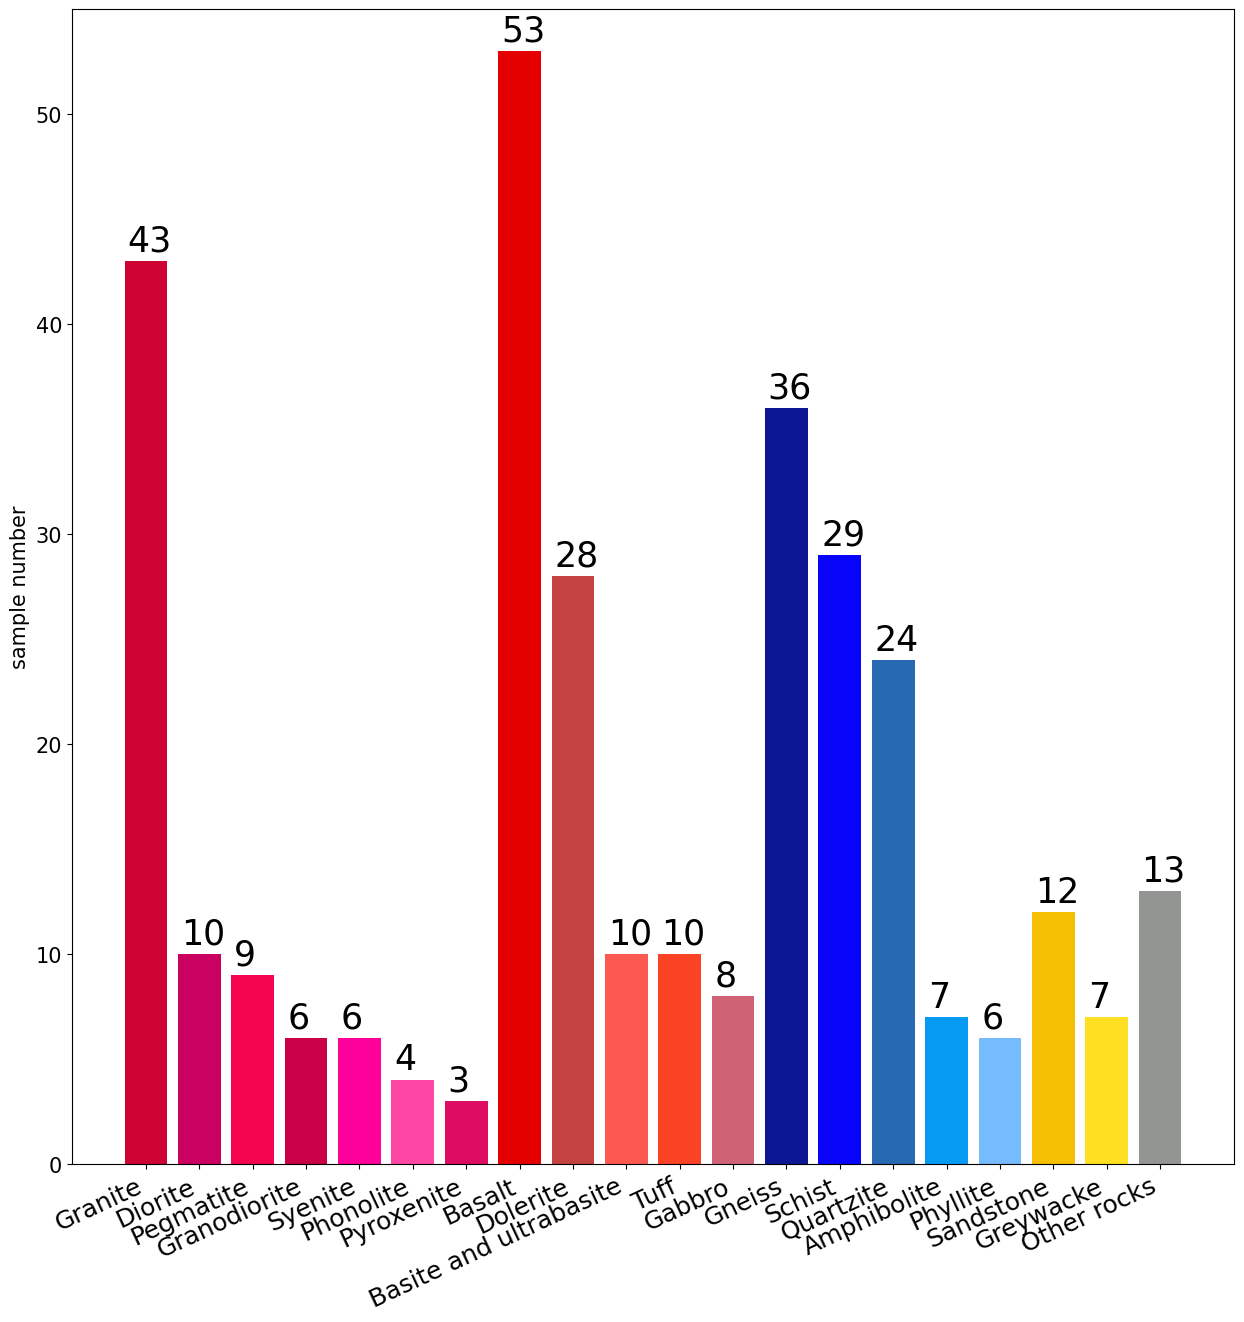

In [46]:
x_category = [
    "Granite",    
    "Diorite",    
    "Pegmatite",    
    "Granodiorite",    
    "Syenite",  
    "Phonolite",  
    "Pyroxenite",    
    
    "Basalt",      
    "Dolerite",      
    "Basite and ultrabasite",      
    "Tuff",
    "Gabbro",
    
    "Gneiss", 
    "Schist",        
    "Quartzite",    
    "Amphibolite",    
    "Phyllite",
    
    "Sandstone",    
    "Greywacke",

    "Other rocks"
]

y_sample_num = [
    len(NAPA_Granite_df),    
    len(NAPA_Diorit_df),    
    len(NAPA_Pegmatite_df),
    len(NAPA_Granodiorite_df),
    len(NAPA_Syenite_df),
    len(NAPA_Phonolite_df),       
    len(NAPA_Pyroxenit_df), 
    
    len(NAPA_Basalt_df),
    len(NAPA_Dolerite_df),    
    len(NAPA_Basite_and_ultrabasite_df),    
    len(NAPA_Tuff_df),
    len(NAPA_Gabbro_df),

    
    len(NAPA_Gneis_df),
    len(NAPA_schist_df),    
    len(NAPA_Quarzit_df),    
    len(NAPA_amphibolite_df),
    len(NAPA_Phyllit_df),
    
    len(NAPA_Sandstone_df),    
    len(NAPA_Grauwacke_df),
    
    len(NAPA_Spectail_rocks_df)
]

# plot
figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

plt.bar(
    x_category,
    y_sample_num,
    color=[
        "xkcd:cherry",
        "xkcd:deep pink",      
        "xkcd:pink red",             
        "xkcd:ruby",
        "xkcd:neon pink", 
        "xkcd:barbie pink",          
        "xkcd:cerise",         
      
        "xkcd:red",   
        "xkcd:reddish",
        "xkcd:coral",           
        "xkcd:orangey red",
        "xkcd:rose", 
        
        "xkcd:royal",           
        "xkcd:primary blue",         
        "xkcd:mid blue",            
        "xkcd:azure",     
        "xkcd:sky blue",  
                
        "xkcd:golden",            
        "xkcd:sun yellow",   
        
        "xkcd:grey" 
    ],
)

ax1.set_ylim([0 , 55])
plt.ylabel("sample number", fontsize=15)
plt.setp(ax1.get_xticklabels(), rotation=25, ha="right")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.xaxis.set_tick_params(labelsize=18)
# ax1.grid(visible=True, which='major' ,axis='y' , color='k', linestyle='-' , alpha=0.35)

for p in ax1.patches:
    ax1.annotate(
        "{:.0f}".format(p.get_height()),
        (p.get_x() + 0.05, p.get_height() + 0.5),
        fontsize=25,
    )

plt.savefig(
    export_fig_path_NAPA + "sample_histogramm_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

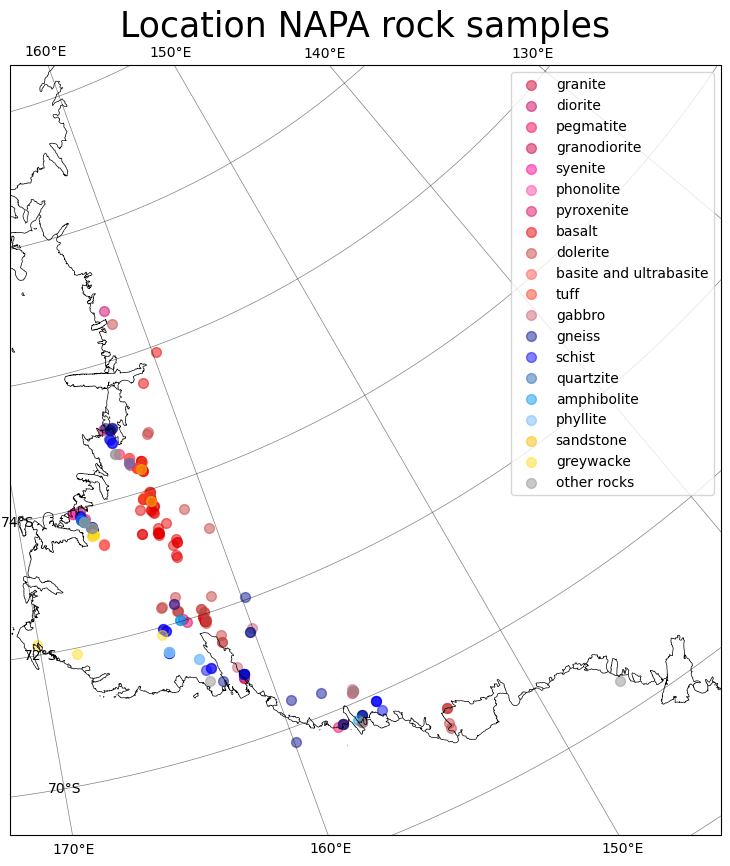

In [47]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)



NAPA_Granite_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:cherry", 
    markersize=50, 
    alpha=0.5, 
    label="granite"
)

NAPA_Diorit_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:deep pink", 
    markersize=50, 
    alpha=0.5, 
    label="diorite"
)

NAPA_Pegmatite_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:pink red",
    markersize=50, 
    alpha=0.5,
    label="pegmatite"
)

NAPA_Granodiorite_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:ruby", 
    markersize=50, 
    alpha=0.5, 
    label="granodiorite"
)

NAPA_Syenite_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:neon pink",
    markersize=50, 
    alpha=0.5, 
    label="syenite"
)

NAPA_Phonolite_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:barbie pink",
    markersize=50, 
    alpha=0.5, 
    label="phonolite"
)

NAPA_Pyroxenit_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:cerise",
    markersize=50,
    alpha=0.5, 
    label="pyroxenite"
)




NAPA_Basalt_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:red", 
    markersize=50, 
    alpha=0.5, 
    label="basalt"
)

NAPA_Dolerite_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:reddish",
    markersize=50, 
    alpha=0.5,
    label="dolerite"
)

NAPA_Basite_and_ultrabasite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:coral",
    markersize=50,
    alpha=0.5,
    label="basite and ultrabasite",
)

NAPA_Tuff_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:orangey red",
    markersize=50, 
    alpha=0.5, 
    label="tuff"
)

NAPA_Gabbro_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:rose",
    markersize=50, 
    alpha=0.5, 
    label="gabbro"
)



NAPA_Gneis_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:royal", 
    markersize=50,
    alpha=0.5, 
    label="gneiss"
)

NAPA_schist_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:primary blue",
    markersize=50, 
    alpha=0.5, 
    label="schist"
)

NAPA_Quarzit_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:mid blue",
    markersize=50,
    alpha=0.5, 
    label="quartzite"
)

NAPA_amphibolite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:azure",
    markersize=50,
    alpha=0.5,
    label="amphibolite",
)

NAPA_Phyllit_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:sky blue",
    markersize=50, 
    alpha=0.5, 
    label="phyllite"
)



NAPA_Sandstone_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:golden",
    markersize=50, 
    alpha=0.5,
    label="sandstone"
)

NAPA_Grauwacke_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:sun yellow",
    markersize=50,
    alpha=0.5,
    label="greywacke"
)


NAPA_Spectail_rocks_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:gray", 
    markersize=50, 
    alpha=0.5, 
    label="other rocks"
)

ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.3e6, -1e6])
ax1.legend(loc="upper right")
ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "rock_typ_location.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

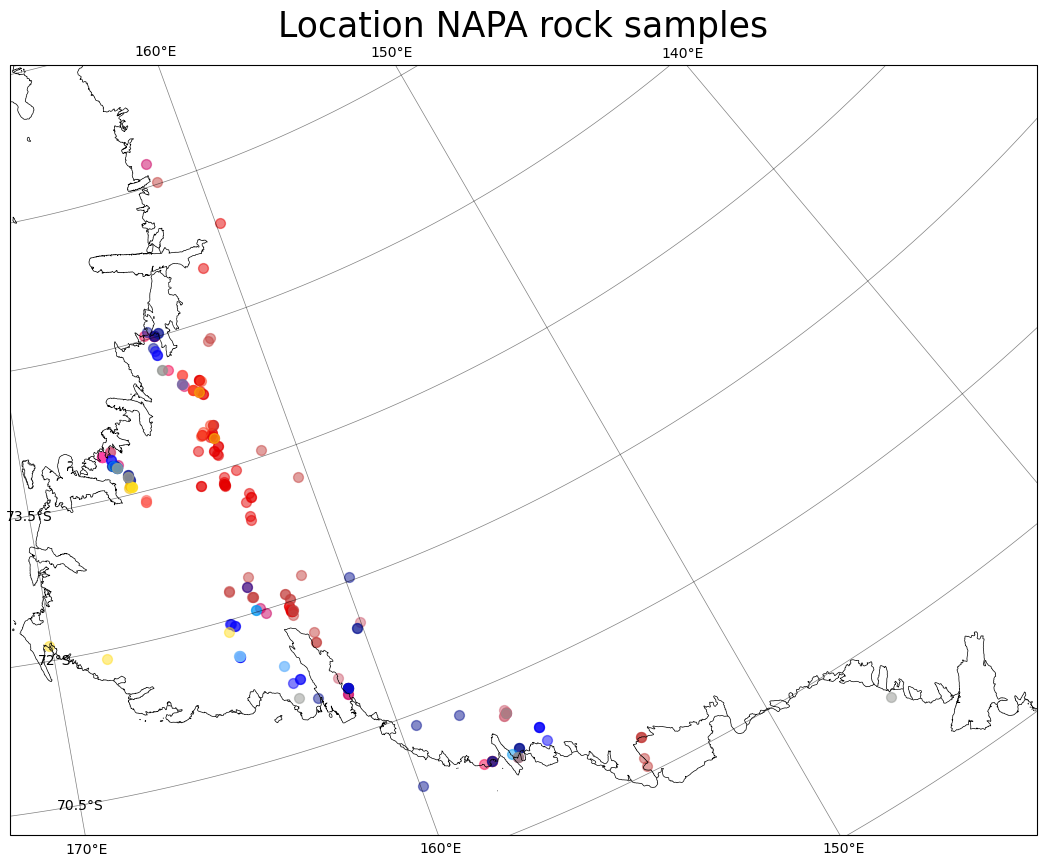

In [48]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)

NAPA_Granite_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:cherry", 
    markersize=50, 
    alpha=0.5, 
    label="granite"
)

NAPA_Diorit_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:deep pink", 
    markersize=50, 
    alpha=0.5, 
    label="diorite"
)

NAPA_Pegmatite_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:pink red",
    markersize=50, 
    alpha=0.5,
    label="pegmatite"
)

NAPA_Granodiorite_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:ruby", 
    markersize=50, 
    alpha=0.5, 
    label="granodiorite"
)

NAPA_Syenite_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:neon pink",
    markersize=50, 
    alpha=0.5, 
    label="syenite"
)

NAPA_Phonolite_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:barbie pink",
    markersize=50, 
    alpha=0.5, 
    label="phonolite"
)

NAPA_Pyroxenit_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:cerise",
    markersize=50,
    alpha=0.5, 
    label="pyroxenite"
)




NAPA_Basalt_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:red", 
    markersize=50, 
    alpha=0.5, 
    label="basalt"
)

NAPA_Dolerite_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:reddish",
    markersize=50, 
    alpha=0.5,
    label="dolerite"
)

NAPA_Basite_and_ultrabasite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:coral",
    markersize=50,
    alpha=0.5,
    label="basite and ultrabasite",
)

NAPA_Tuff_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:orangey red",
    markersize=50, 
    alpha=0.5, 
    label="tuff"
)

NAPA_Gabbro_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:rose",
    markersize=50, 
    alpha=0.5, 
    label="gabbro"
)



NAPA_Gneis_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:royal", 
    markersize=50,
    alpha=0.5, 
    label="gneiss"
)

NAPA_schist_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:primary blue",
    markersize=50, 
    alpha=0.5, 
    label="schist"
)

NAPA_Quarzit_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:mid blue",
    markersize=50,
    alpha=0.5, 
    label="quartzite"
)

NAPA_amphibolite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="xkcd:azure",
    markersize=50,
    alpha=0.5,
    label="amphibolite",
)

NAPA_Phyllit_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:sky blue",
    markersize=50, 
    alpha=0.5, 
    label="phyllite"
)



NAPA_Sandstone_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="xkcd:golden",
    markersize=50, 
    alpha=0.5,
    label="sandstone"
)

NAPA_Grauwacke_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="xkcd:sun yellow",
    markersize=50,
    alpha=0.5,
    label="greywacke"
)


NAPA_Spectail_rocks_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="xkcd:gray", 
    markersize=50, 
    alpha=0.5, 
    label="other rocks"
)

ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.2e6, -1.3e6])

ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "rock_typ_location_zoom_paper.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### plot density box plot

In [49]:
amphibolite_all_sus_NAPA = np.vstack(
    [
        NAPA_amphibolite_df["susceptibility_1 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_2 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_3 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_4 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_5 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_6 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_7 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

basalt_all_sus_NAPA = np.vstack(
    [
        NAPA_Basalt_df["susceptibility_1 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_2 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_3 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_4 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_5 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_6 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_7 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_8 (10-3 SI)"],
    ]
).T

basite_ultrabasite_all_sus_NAPA = np.vstack(
    [
        NAPA_Basite_and_ultrabasite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

diorite_all_sus_NAPA = np.vstack(
    [
        NAPA_Diorit_df["susceptibility_1 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_2 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_3 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_4 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_5 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_6 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_7 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_8 (10-3 SI)"],
    ]
).T

dolerite_all_sus_NAPA = np.vstack(
    [
        NAPA_Dolerite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

gabbro_all_sus_NAPA = np.vstack(
    [
        NAPA_Gabbro_df["susceptibility_1 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_2 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_3 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_4 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_5 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_6 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_7 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_8 (10-3 SI)"],
    ]
).T

gneiss_all_sus_NAPA = np.vstack(
    [
        NAPA_Gneis_df["susceptibility_1 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_2 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_3 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_4 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_5 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_6 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_7 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_8 (10-3 SI)"],
    ]
).T

granite_all_sus_NAPA = np.vstack(
    [
        NAPA_Granite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

granodiorite_all_sus_NAPA = np.vstack(
    [
        NAPA_Granodiorite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

greywacke_all_sus_NAPA = np.vstack(
    [
        NAPA_Grauwacke_df["susceptibility_1 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_2 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_3 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_4 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_5 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_6 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_7 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_8 (10-3 SI)"],
    ]
).T

pegmatite_all_sus_NAPA = np.vstack(
    [
        NAPA_Pegmatite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

phonolite_all_sus_NAPA = np.vstack(
    [
        NAPA_Phonolite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

phyllite_all_sus_NAPA = np.vstack(
    [
        NAPA_Phyllit_df["susceptibility_1 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_2 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_3 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_4 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_5 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_6 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_7 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_8 (10-3 SI)"],
    ]
).T

pyroxenite_all_sus_NAPA = np.vstack(
    [
        NAPA_Pyroxenit_df["susceptibility_1 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_2 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_3 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_4 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_5 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_6 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_7 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_8 (10-3 SI)"],
    ]
).T

quartzite_all_sus_NAPA = np.vstack(
    [
        NAPA_Quarzit_df["susceptibility_1 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_2 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_3 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_4 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_5 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_6 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_7 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_8 (10-3 SI)"],
    ]
).T

sandstone_all_sus_NAPA = np.vstack(
    [
        NAPA_Sandstone_df["susceptibility_1 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_2 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_3 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_4 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_5 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_6 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_7 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_8 (10-3 SI)"],
    ]
).T

schist_all_sus_NAPA = np.vstack(
    [
        NAPA_schist_df["susceptibility_1 (10-3 SI)"],
        NAPA_schist_df["susceptibility_2 (10-3 SI)"],
        NAPA_schist_df["susceptibility_3 (10-3 SI)"],
        NAPA_schist_df["susceptibility_4 (10-3 SI)"],
        NAPA_schist_df["susceptibility_5 (10-3 SI)"],
        NAPA_schist_df["susceptibility_6 (10-3 SI)"],
        NAPA_schist_df["susceptibility_7 (10-3 SI)"],
        NAPA_schist_df["susceptibility_8 (10-3 SI)"],
    ]
).T


syenite_all_sus_NAPA = np.vstack(
    [
        NAPA_Syenite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

tuff_all_sus_NAPA = np.vstack(
    [
        NAPA_Tuff_df["susceptibility_1 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_2 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_3 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_4 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_5 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_6 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_7 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_8 (10-3 SI)"],
    ]
).T

special_rocks_all_sus_NAPA = np.vstack(
    [
        NAPA_Spectail_rocks_df["susceptibility_1 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_2 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_3 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_4 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_5 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_6 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_7 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_8 (10-3 SI)"],
    ]
).T

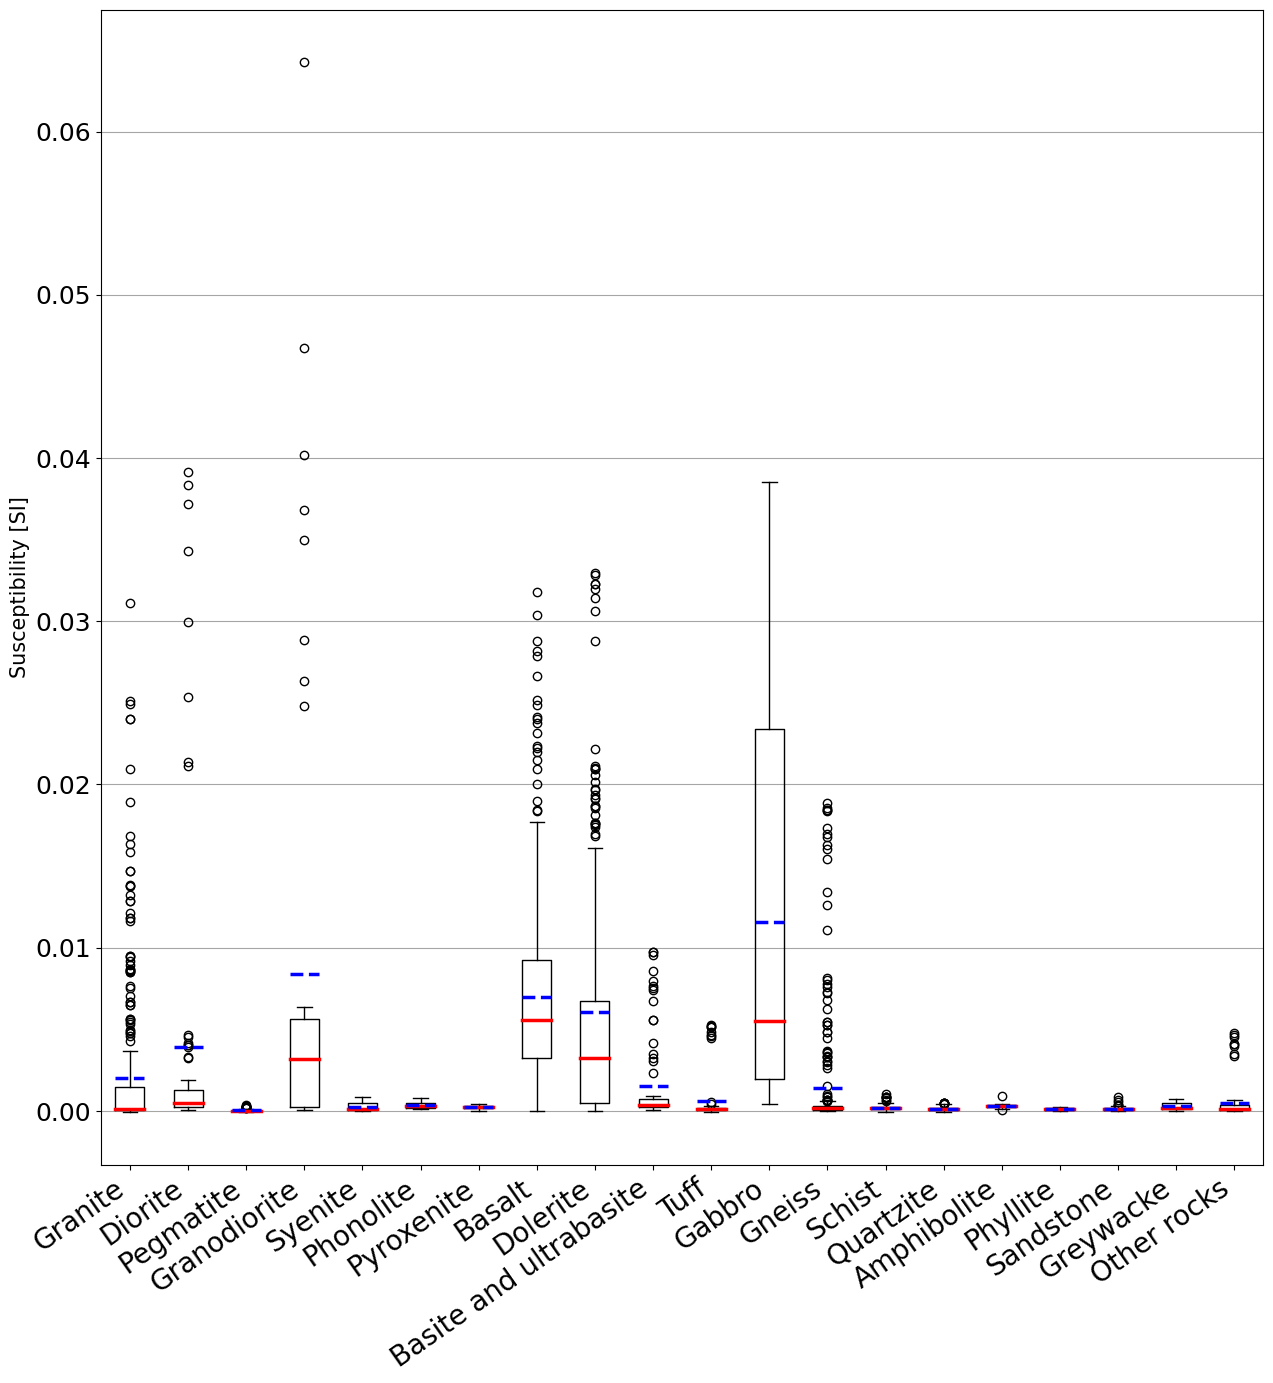

In [50]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


sus_values_ls = [
    granite_all_sus_NAPA.flatten(),    
    diorite_all_sus_NAPA.flatten(),
    pegmatite_all_sus_NAPA.flatten(),
    granodiorite_all_sus_NAPA.flatten(),
    syenite_all_sus_NAPA.flatten(),
    phonolite_all_sus_NAPA.flatten(),
    pyroxenite_all_sus_NAPA.flatten(),

    basalt_all_sus_NAPA.flatten(),    
    dolerite_all_sus_NAPA.flatten(),    
    basite_ultrabasite_all_sus_NAPA.flatten(),
    tuff_all_sus_NAPA.flatten(),
    gabbro_all_sus_NAPA.flatten(),

    gneiss_all_sus_NAPA.flatten(),    
    schist_all_sus_NAPA.flatten(),    
    quartzite_all_sus_NAPA.flatten(),
    amphibolite_all_sus_NAPA.flatten(),
    phyllite_all_sus_NAPA.flatten(),
    
    sandstone_all_sus_NAPA.flatten(),
    greywacke_all_sus_NAPA.flatten(),
    
    special_rocks_all_sus_NAPA.flatten(),   
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    sus_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Granite",    
    "Diorite",    
    "Pegmatite",    
    "Granodiorite",    
    "Syenite",  
    "Phonolite",  
    "Pyroxenite",    
    
    "Basalt",      
    "Dolerite",      
    "Basite and ultrabasite",      
    "Tuff",
    "Gabbro",
    
    "Gneiss", 
    "Schist",        
    "Quartzite",    
    "Amphibolite",    
    "Phyllite",
    
    "Sandstone",    
    "Greywacke",

    "Other rocks"
]

x_ticks_num = np.arange(1, 21, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=35, ha="right")
ax1.set_ylabel("Susceptibility [SI]", fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_susceptibility_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### Plot density box plot 

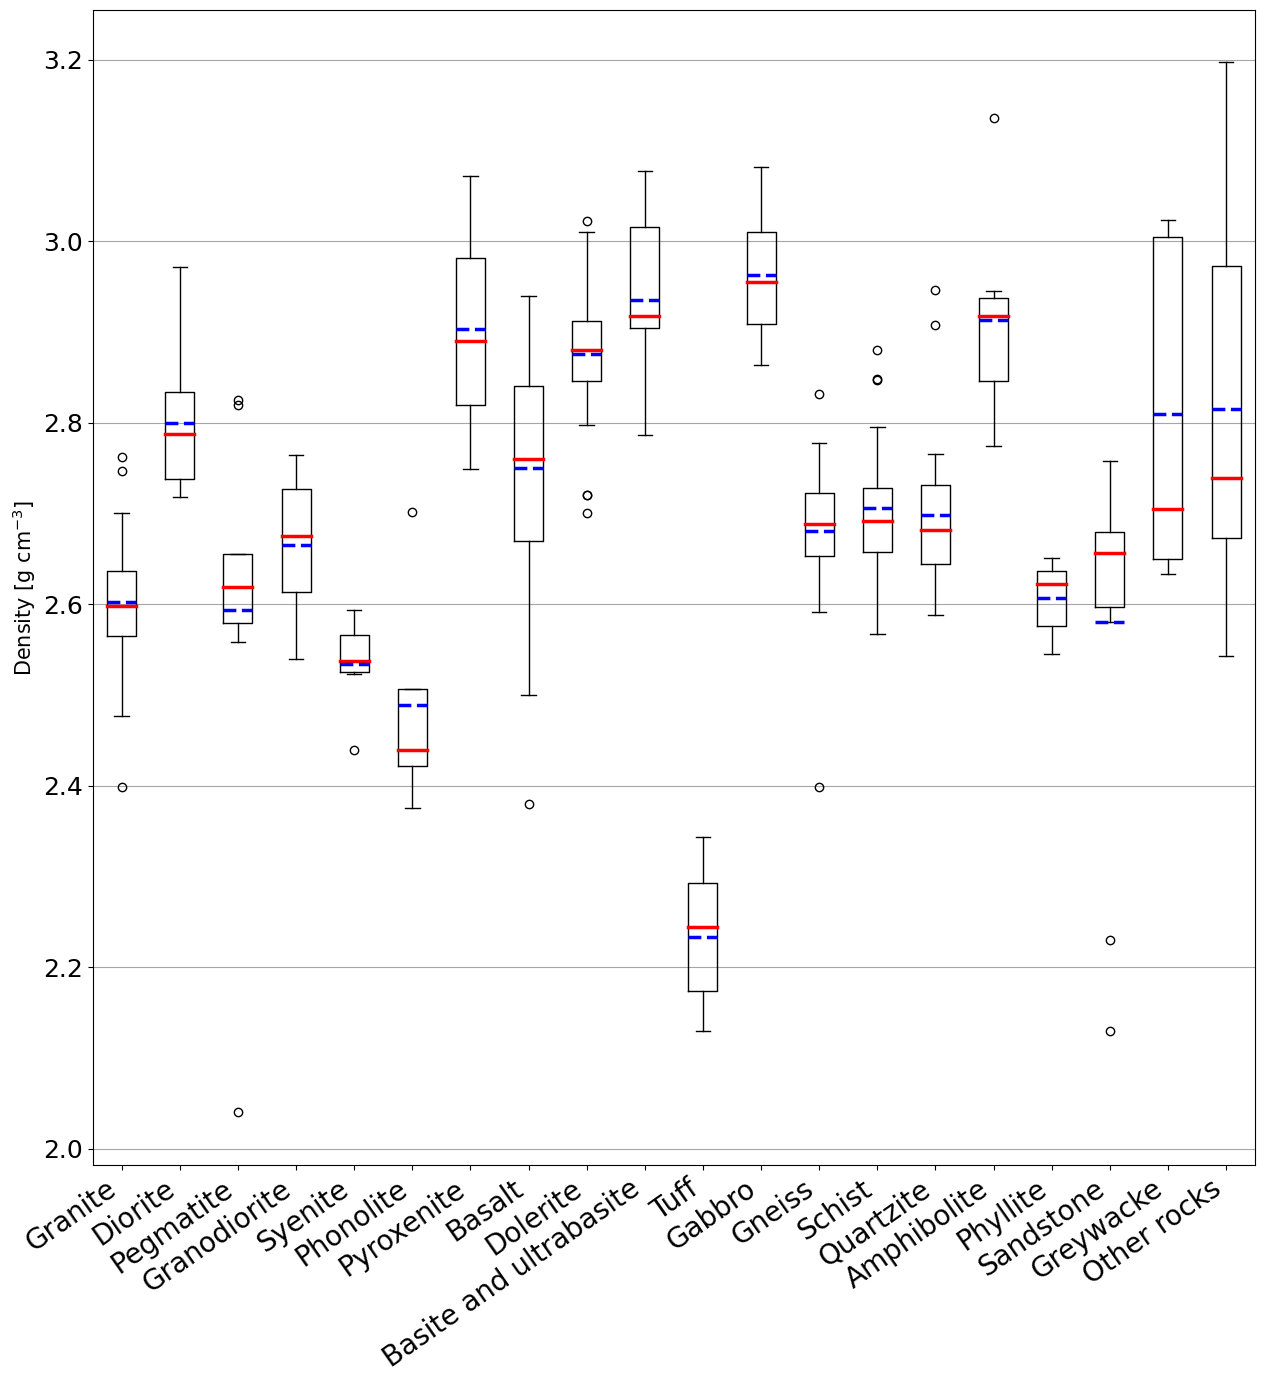

In [51]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


dens_values_ls = [
    NAPA_Granite_df["density (g/cm^3)"],    
    NAPA_Diorit_df["density (g/cm^3)"],
    NAPA_Pegmatite_df["density (g/cm^3)"],
    NAPA_Granodiorite_df["density (g/cm^3)"],
    NAPA_Syenite_df["density (g/cm^3)"],
    NAPA_Phonolite_df["density (g/cm^3)"],
    NAPA_Pyroxenit_df["density (g/cm^3)"],
    
    NAPA_Basalt_df["density (g/cm^3)"],    
    NAPA_Dolerite_df["density (g/cm^3)"],    
    NAPA_Basite_and_ultrabasite_df["density (g/cm^3)"],
    NAPA_Tuff_df["density (g/cm^3)"],
    NAPA_Gabbro_df["density (g/cm^3)"],
    
    NAPA_Gneis_df["density (g/cm^3)"],    
    NAPA_schist_df["density (g/cm^3)"],    
    NAPA_Quarzit_df["density (g/cm^3)"],    
    NAPA_amphibolite_df["density (g/cm^3)"],
    NAPA_Phyllit_df["density (g/cm^3)"],
    
    NAPA_Sandstone_df["density (g/cm^3)"],
    NAPA_Grauwacke_df["density (g/cm^3)"],
    
    NAPA_Spectail_rocks_df["density (g/cm^3)"]    
]


figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    dens_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Granite",    
    "Diorite",    
    "Pegmatite",    
    "Granodiorite",    
    "Syenite",  
    "Phonolite",  
    "Pyroxenite",    
    
    "Basalt",      
    "Dolerite",      
    "Basite and ultrabasite",      
    "Tuff",
    "Gabbro",
    
    "Gneiss", 
    "Schist",        
    "Quartzite",    
    "Amphibolite",    
    "Phyllite",
    
    "Sandstone",    
    "Greywacke",

    "Other rocks"
]

x_ticks_num = np.arange(1, 21, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=35, ha="right")
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_density_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

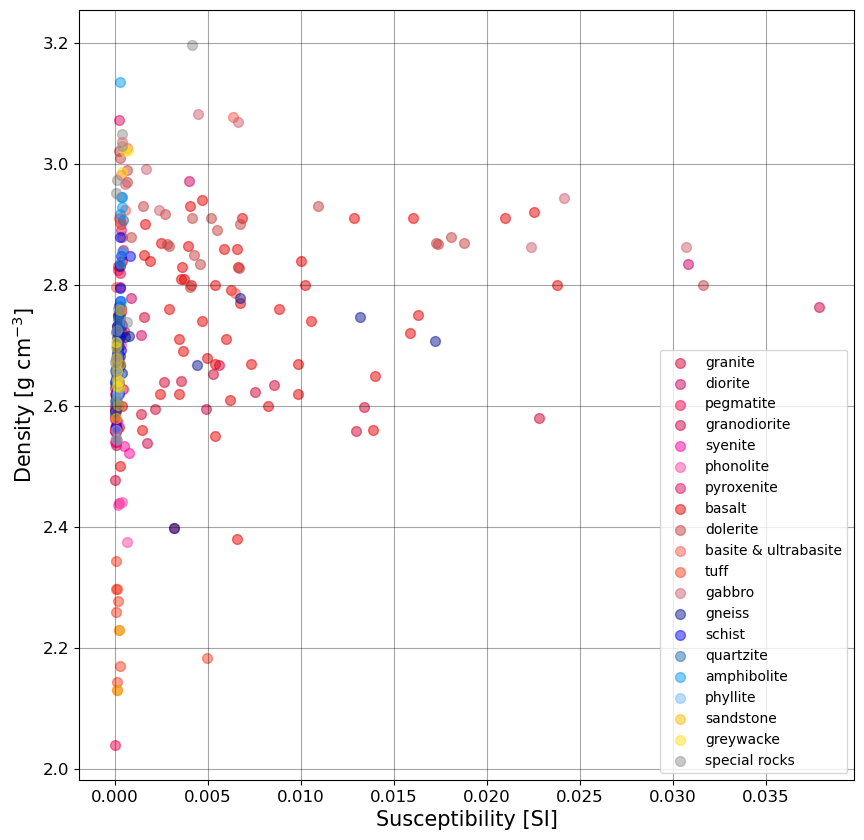

In [52]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")

ax1 = plt.subplot(1, 1, 1)


NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:cherry",
    alpha=0.5,
    label="granite",
)

NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:deep pink",
    alpha=0.5,
    label="diorite",
)

NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:pink red",
    alpha=0.5,
    label="pegmatite",
)

NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:ruby",
    alpha=0.5,
    label="granodiorite",
)

NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:neon pink",
    alpha=0.5,
    label="syenite",
)

NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:barbie pink",
    alpha=0.5,
    label="phonolite",
)

NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:cerise",
    alpha=0.5,
    label="pyroxenite",
)




NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:red",
    alpha=0.5,
    label="basalt",
)

NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:reddish",
    alpha=0.5,
    label="dolerite",
)

NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:coral",
    alpha=0.5,
    label="basite & ultrabasite",
)

NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:orangey red",
    alpha=0.5,
    label="tuff",
)

NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:rose",
    alpha=0.5,
    label="gabbro",
)





NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:royal",
    alpha=0.5,
    label="gneiss",
)


NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:primary blue",
    alpha=0.5,
    label="schist",
)


NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:mid blue",
    alpha=0.5,
    label="quartzite",
)


NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:azure",
    alpha=0.5,
    label="amphibolite",
)


NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:sky blue",
    alpha=0.5,
    label="phyllite",
)


NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:golden",
    alpha=0.5,
    label="sandstone",
)


NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:sun yellow",
    alpha=0.5,
    label="greywacke",
)



NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:grey",
    alpha=0.5,
    label="special rocks",
)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_colored.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

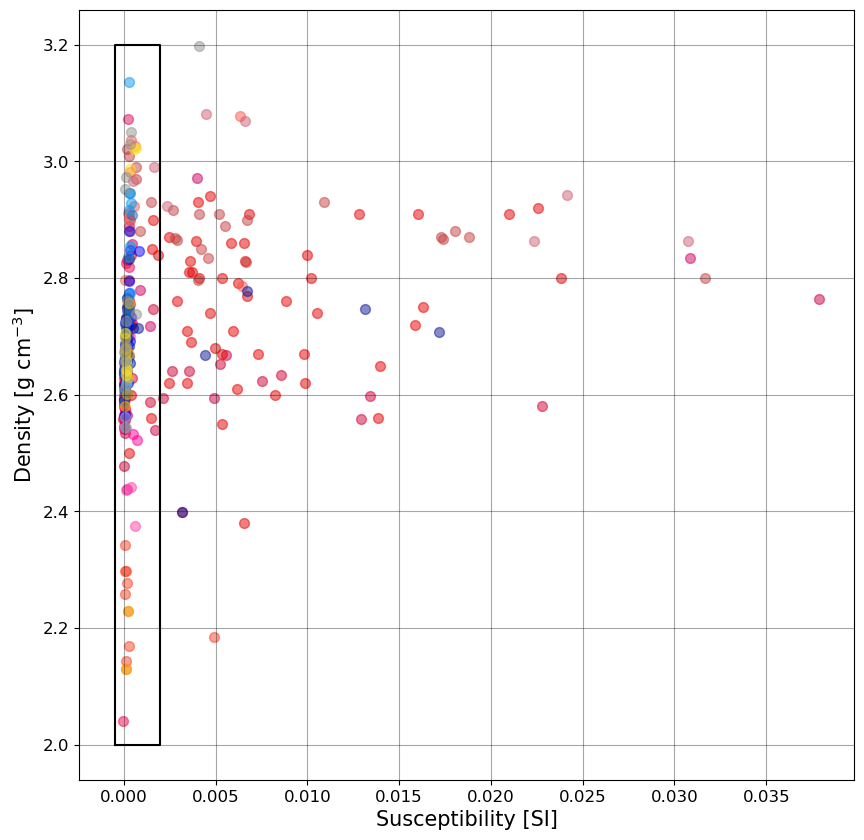

In [53]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:cherry",
    alpha=0.5,
#     label="granite",
)

NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:deep pink",
    alpha=0.5,
#     label="diorite",
)

NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:pink red",
    alpha=0.5,
#     label="pegmatite",
)

NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:ruby",
    alpha=0.5,
#     label="granodiorite",
)

NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:neon pink",
    alpha=0.5,
#     label="syenite",
)

NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:barbie pink",
    alpha=0.5,
#     label="phonolite",
)

NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:cerise",
    alpha=0.5,
#     label="pyroxenite",
)


NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:red",
    alpha=0.5,
#     label="basalt",
)

NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:reddish",
    alpha=0.5,
#     label="dolerite",
)

NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:coral",
    alpha=0.5,
#     label="basite & ultrabasite",
)

NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:orangey red",
    alpha=0.5,
#     label="tuff",
)

NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:rose",
    alpha=0.5,
#     label="gabbro",
)


NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:royal",
    alpha=0.5,
#     label="gneiss",
)


NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:primary blue",
    alpha=0.5,
#     label="schist",
)


NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:mid blue",
    alpha=0.5,
#     label="quartzite",
)


NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:azure",
    alpha=0.5,
#     label="amphibolite",
)


NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:sky blue",
    alpha=0.5,
#     label="phyllite",
)


NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:golden",
    alpha=0.5,
#     label="sandstone",
)


NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:sun yellow",
    alpha=0.5,
#     label="greywacke",
)



NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:grey",
    alpha=0.5,
#     label="special rocks",
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_colored_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

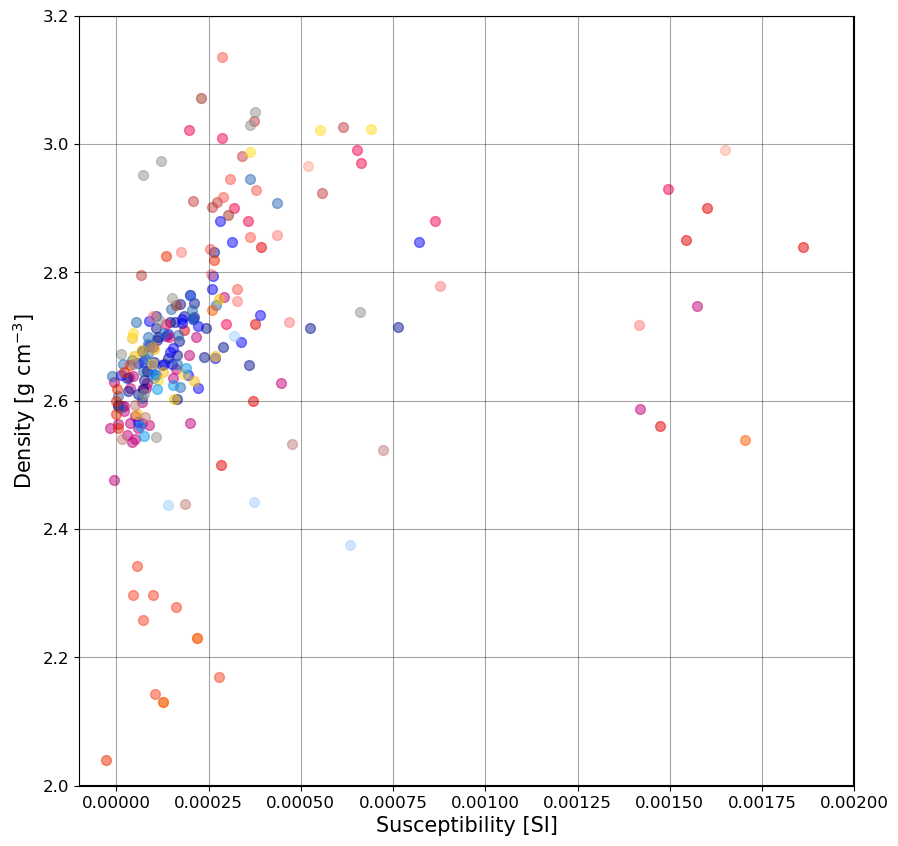

In [54]:
NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:cherry",
    alpha=0.5,
#     label="granite",
)

NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:deep pink",
    alpha=0.5,
#     label="diorite",
)

NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:pink red",
    alpha=0.5,
#     label="pegmatite",
)

NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:ruby",
    alpha=0.5,
#     label="granodiorite",
)

NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:neon pink",
    alpha=0.5,
#     label="syenite",
)

NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:barbie pink",
    alpha=0.5,
#     label="phonolite",
)

NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:cerise",
    alpha=0.5,
#     label="pyroxenite",
)

NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:red",
    alpha=0.5,
#     label="basalt",
)

NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:reddish",
    alpha=0.5,
#     label="dolerite",
)

NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:coral",
    alpha=0.5,
#     label="basite & ultrabasite",
)

NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:orangey red",
    alpha=0.5,
#     label="tuff",
)

NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:rose",
    alpha=0.5,
#     label="gabbro",
)

NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:royal",
    alpha=0.5,
#     label="gneiss",
)


NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:primary blue",
    alpha=0.5,
#     label="schist",
)


NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:mid blue",
    alpha=0.5,
#     label="quartzite",
)


NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:azure",
    alpha=0.5,
#     label="amphibolite",
)


NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:sky blue",
    alpha=0.5,
#     label="phyllite",
)


NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:golden",
    alpha=0.5,
#     label="sandstone",
)


NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:sun yellow",
    alpha=0.5,
#     label="greywacke",
)

NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:grey",
    alpha=0.5,
#     label="special rocks",
)

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:red",
    alpha=0.5,
#     label="basalt",
)

NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:magenta",
    alpha=0.5,
#     label="granite",
)

NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:royal",
    alpha=0.5,
#     label="gneiss",
)

NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:primary blue",
    alpha=0.5,
#     label="schist",
)

NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:pink red",
    alpha=0.5,
#     label="dolerite",
)

NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:mid blue",
    alpha=0.5,
#     label="quartzite",
)

NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:golden",
    alpha=0.5,
#     label="sandstone",
)

NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:salmon pink",
    alpha=0.5,
#     label="diorite",
)

NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:reddish",
    alpha=0.5,
#     label="basite & ultrabasite",
)

NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:orangey red",
    alpha=0.5,
#     label="tuff",
)

NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:tomato red",
    alpha=0.5,
#     label="pegmatite",
)

NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:light salmon",
    alpha=0.5,
#     label="gabbro",
)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:coral",
    alpha=0.5,
#     label="amphibolite",
)

NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:sun yellow",
    alpha=0.5,
#     label="greywacke",
)


NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:bright orange",
    alpha=0.5,
#     label="granodiorite",
)

NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:azure",
    alpha=0.5,
#     label="phyllite",
)

NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:brownish pink",
    alpha=0.5,
#     label="syenite",
)


NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:baby blue",
    alpha=0.5,
#     label="phonolite",
)

NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:brick",
    alpha=0.5,
#     label="pyroxenite",
)

NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="xkcd:grey",
    alpha=0.5,
#     label="special rocks",
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(loc="lower right")

ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)